In [ ]:
# Suppressing warnings
options(warn=-1)



In [ ]:
#Loading the Libraries
install.packages("caTools")
library(tidyverse)
library(ggplot2)
library(caTools)

install.packages("caret")
library(caret)

install.packages("plotly")
library(plotly)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’

In [ ]:
# Reading CSV file
df <- read.csv("heart.csv")


In [ ]:
# Displaying information about the dataframe
str(df)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trtbps  : int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalachh: int  150 187 172 178 163 148 153 173 162 174 ...
 $ exng    : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slp     : int  0 0 2 2 2 1 1 2 2 2 ...
 $ caa     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thall   : int  1 2 2 2 2 1 2 3 3 2 ...
 $ output  : int  1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
df$sex = factor(df$sex)
df$cp = factor(df$cp)

In [ ]:
# Checking for missing values
print(colSums(is.na(df)))


     age      sex       cp   trtbps     chol      fbs  restecg thalachh 
       0        0        0        0        0        0        0        0 
    exng  oldpeak      slp      caa    thall   output 
       0        0        0        0        0        0 


In [ ]:
# Checking for duplicated rows
print(sum(duplicated(df)))


[1] 1


In [ ]:
# Displaying duplicated rows
print(df[duplicated(df), ])


    age sex cp trtbps chol fbs restecg thalachh exng oldpeak slp caa thall
165  38   1  2    138  175   0       1      173    0       0   2   4     2
    output
165      1


In [ ]:
# Removing duplicated rows
df <- df[!duplicated(df), ]

In [ ]:
# Displaying the updated dataframe shape
print(dim(df))

[1] 302  14


In [ ]:
# Displaying value counts for each column NR
for (col in colnames(df)) {
  cat("Column: ", col, "\n")
  print(table(df[[col]]))
}

Column:  age 

29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 
 1  2  4  2  2  4  3 10  8  8 11  8  7  5  7  5  7 12 13  8 16  8 11 17 19 14 
60 61 62 63 64 65 66 67 68 69 70 71 74 76 77 
11  8 11  9 10  8  7  9  4  3  4  3  1  1  1 
Column:  sex 

  0   1 
 96 206 
Column:  cp 

  0   1   2   3 
143  50  86  23 
Column:  trtbps 

 94 100 101 102 104 105 106 108 110 112 114 115 117 118 120 122 123 124 125 126 
  2   4   1   2   1   3   1   6  19   9   1   3   1   7  37   4   1   6  11   3 
128 129 130 132 134 135 136 138 140 142 144 145 146 148 150 152 154 155 156 160 
 12   1  36   8   5   6   3  12  32   3   2   5   2   2  17   5   1   1   1  11 
164 165 170 172 174 178 180 192 200 
  1   1   4   1   1   2   3   1   1 
Column:  chol 

126 131 141 149 157 160 164 166 167 168 169 172 174 175 176 177 178 180 182 183 
  1   1   1   2   1   1   1   1   1   1   1   1   1   2   1   4   1   1   1   1 
184 185 186 187 188 192 193 195 196 197 198 199 200 201 203 

In [ ]:
str(df)

'data.frame':	302 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : Factor w/ 2 levels "0","1": 2 2 1 2 1 2 1 2 2 2 ...
 $ cp      : Factor w/ 4 levels "0","1","2","3": 4 3 2 2 1 1 2 2 3 3 ...
 $ trtbps  : int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalachh: int  150 187 172 178 163 148 153 173 162 174 ...
 $ exng    : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slp     : int  0 0 2 2 2 1 1 2 2 2 ...
 $ caa     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thall   : int  1 2 2 2 2 1 2 3 3 2 ...
 $ output  : int  1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
tail(df)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
298,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
303,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
head(df)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [ ]:
# Displaying summary statistics
print(summary(df))

      age        sex     cp          trtbps           chol      
 Min.   :29.00   0: 96   0:143   Min.   : 94.0   Min.   :126.0  
 1st Qu.:48.00   1:206   1: 50   1st Qu.:120.0   1st Qu.:211.0  
 Median :55.50           2: 86   Median :130.0   Median :240.5  
 Mean   :54.42           3: 23   Mean   :131.6   Mean   :246.5  
 3rd Qu.:61.00                   3rd Qu.:140.0   3rd Qu.:274.8  
 Max.   :77.00                   Max.   :200.0   Max.   :564.0  
      fbs           restecg          thalachh          exng       
 Min.   :0.000   Min.   :0.0000   Min.   : 71.0   Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:133.2   1st Qu.:0.0000  
 Median :0.000   Median :1.0000   Median :152.5   Median :0.0000  
 Mean   :0.149   Mean   :0.5265   Mean   :149.6   Mean   :0.3278  
 3rd Qu.:0.000   3rd Qu.:1.0000   3rd Qu.:166.0   3rd Qu.:1.0000  
 Max.   :1.000   Max.   :2.0000   Max.   :202.0   Max.   :1.0000  
    oldpeak           slp             caa             thall      
 Min.   :0

In [ ]:
# Load necessary libraries
library(ggplot2)
install.packages("corrplot")
library(corrplot)
library(tidyverse)

# Load the CSV file
# df <- read.csv("heart.csv")

# Boxplot of PhysicalHealth
boxplot_drawer <- function(Column_Name) {
  ggplot(df, aes(y = !!sym(Column_Name))) +
    geom_boxplot() +
    labs(title = paste("Boxplot of", Column_Name))
}
print(boxplot_drawer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


function(Column_Name) {
  ggplot(df, aes(y = !!sym(Column_Name))) +
    geom_boxplot() +
    labs(title = paste("Boxplot of", Column_Name))
}


In [ ]:
# Remove outliers
Remove_outliers <- function(Column_Name) {
  q1 <- quantile(df[[Column_Name]], 0.25)
  q3 <- quantile(df[[Column_Name]], 0.75)
  iqr <- q3 - q1
  df[[Column_Name]][(df[[Column_Name]] < (q1 - 1.5 * iqr)) | (df[[Column_Name]] > (q3 + 1.5 * iqr))] <- NA
}

# Check for null values
print(colSums(is.na(df)))

# Drop rows with NA values
df <- na.omit(df)


     age      sex       cp   trtbps     chol      fbs  restecg thalachh 
       0        0        0        0        0        0        0        0 
    exng  oldpeak      slp      caa    thall   output 
       0        0        0        0        0        0 


In [ ]:
df$output

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0

In [ ]:
str(df)

'data.frame':	302 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : Factor w/ 2 levels "0","1": 2 2 1 2 1 2 1 2 2 2 ...
 $ cp      : Factor w/ 4 levels "0","1","2","3": 4 3 2 2 1 1 2 2 3 3 ...
 $ trtbps  : int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalachh: int  150 187 172 178 163 148 153 173 162 174 ...
 $ exng    : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slp     : int  0 0 2 2 2 1 1 2 2 2 ...
 $ caa     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thall   : int  1 2 2 2 2 1 2 3 3 2 ...
 $ output  : int  1 1 1 1 1 1 1 1 1 1 ...


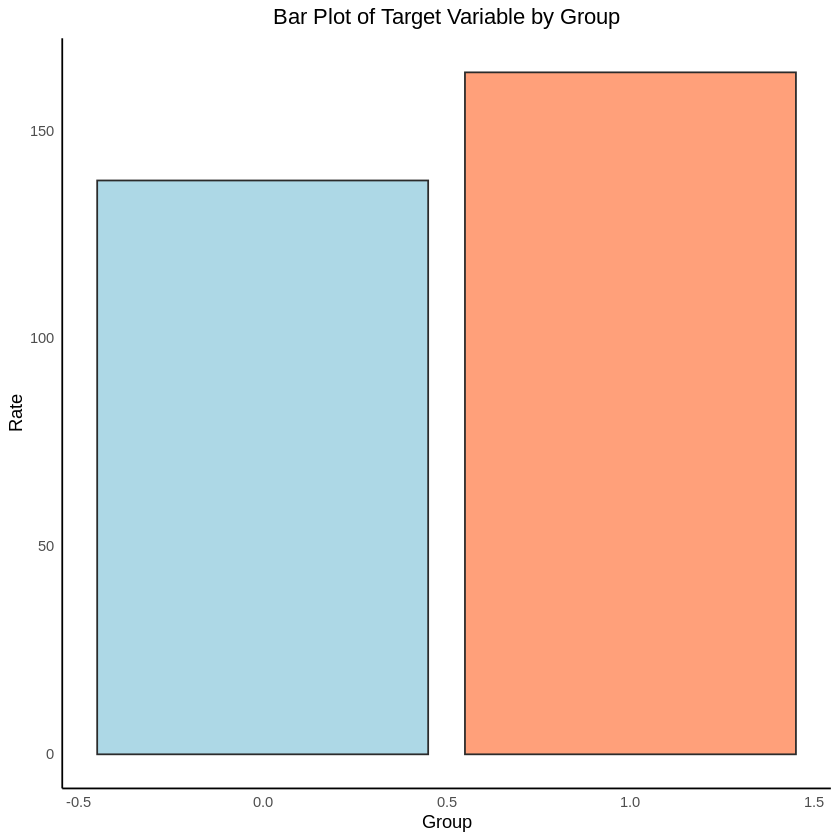

In [ ]:
ggplot(df, aes(x = output)) +
  geom_bar(fill = c("#ADD8E6", "#FFA07A"), color = "#2b2b2b") +  # Light blue and light red colors
  labs(title = "Bar Plot of Target Variable by Group", y = "Rate", x = "Group") +  # Adding labels
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),  # Centering the title
    panel.grid.major = element_blank(),  # Removing major grid lines
    panel.grid.minor = element_blank(),  # Removing minor grid lines
    panel.border = element_blank(),  # Removing the panel border
    axis.line = element_line(color = "black")  # Adding axis line
  )

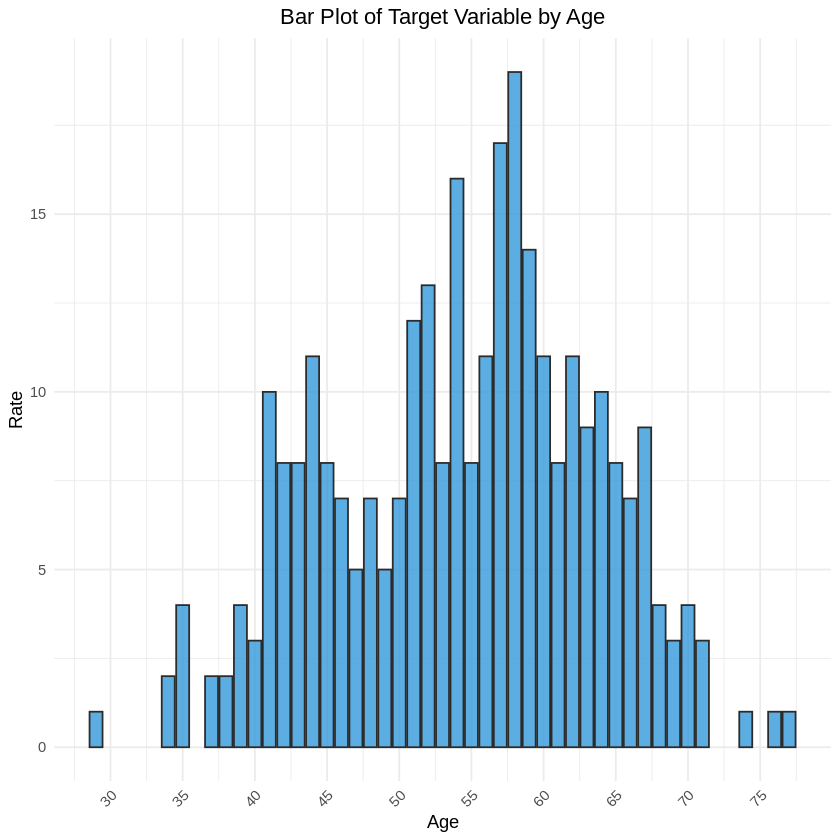

In [ ]:
ggplot(df, aes(x = age)) +
  geom_bar(fill = "#3498db", color = "#2b2b2b", alpha = 0.8) +  # Customizing bar chart colors
  labs(title = "Bar Plot of Target Variable by Age", y = "Rate", x = "Age") +  # Adding labels
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),  # Centering the title
    axis.text.x = element_text(angle = 45, hjust = 1)  # Rotating x-axis labels for better readability
  ) +
  scale_x_continuous(breaks = seq(25, 90, by = 5))

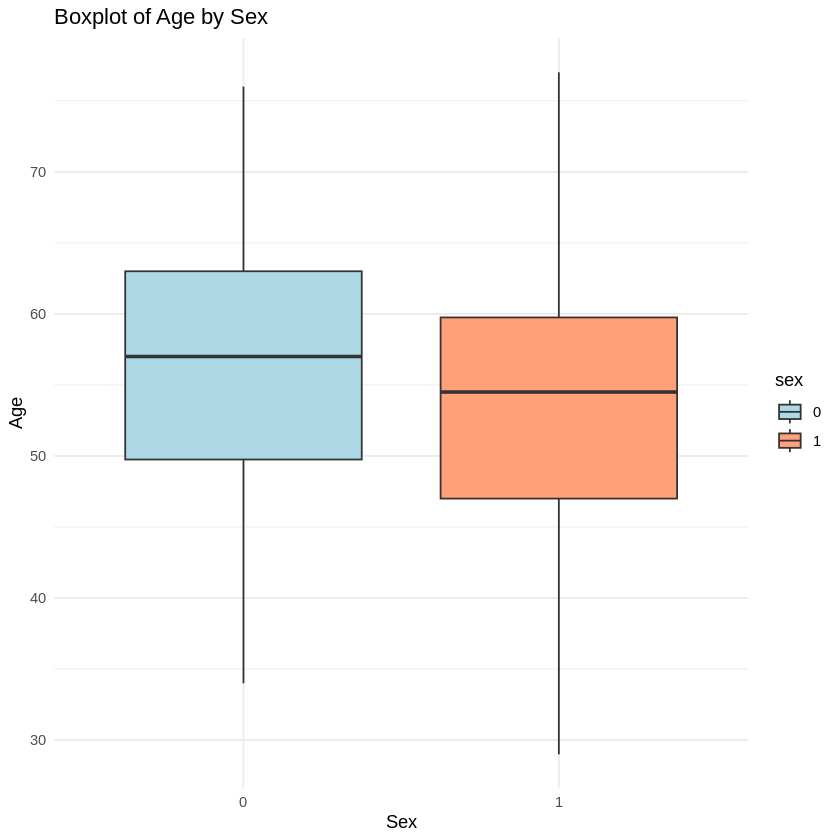

In [ ]:
ggplot(df, aes(x = as.factor(sex), y = age, fill = sex)) +
  geom_boxplot() +
  labs(title = "Boxplot of Age by Sex", y = "Age", x = "Sex") +
  scale_fill_manual(values = c("#ADD8E6", "#FFA07A")) +  # Light blue for male, light red for female
  theme_minimal()

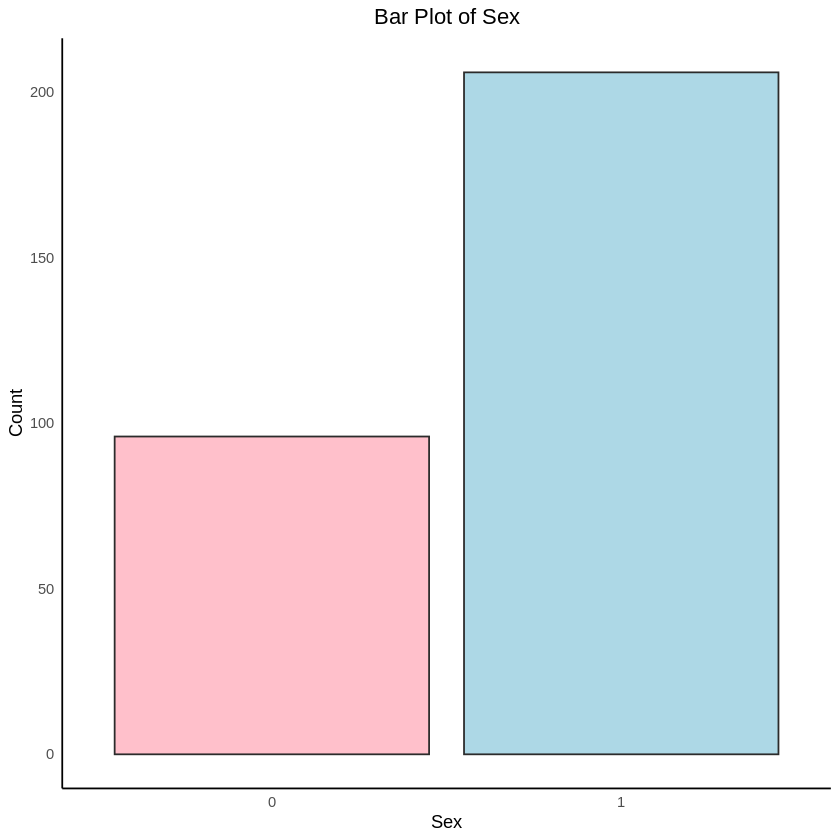

In [ ]:
ggplot(df, aes(x = sex)) +
  geom_bar(fill = c("pink", "lightblue"), color = "#2b2b2b") +
  labs(title = "Bar Plot of Sex", y = "Count", x = "Sex") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),  # Centering the title
    panel.grid.major = element_blank(),  # Removing major grid lines
    panel.grid.minor = element_blank(),  # Removing minor grid lines
    panel.border = element_blank(),  # Removing the panel border
    axis.line = element_line(color = "black")  # Adding axis line
  )

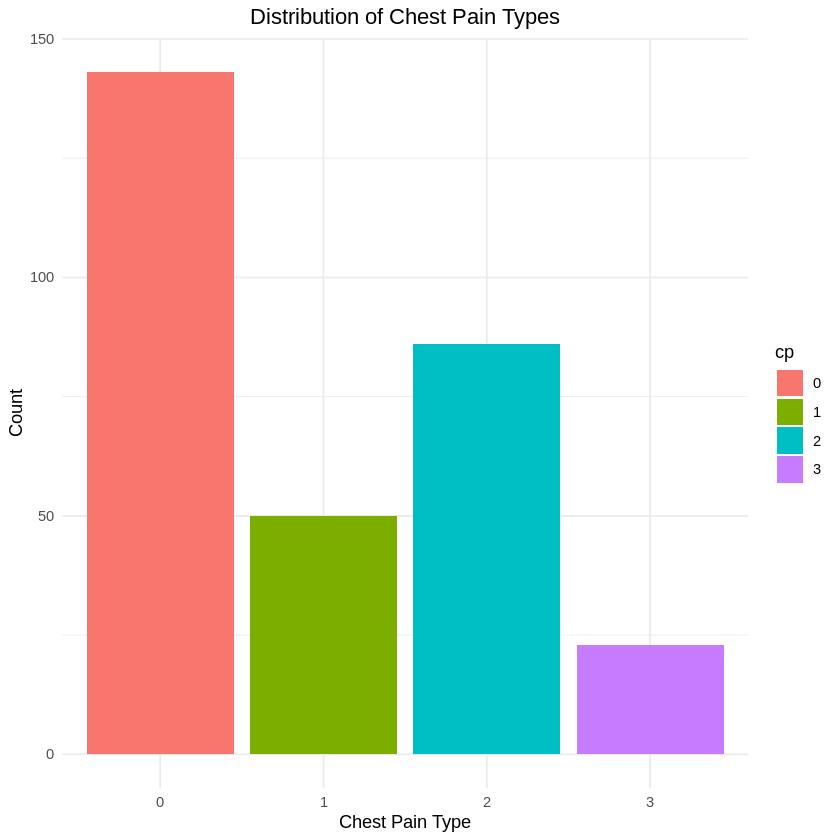

In [ ]:
ggplot(df, aes(x = cp, fill = cp)) +
  geom_bar() +
  labs(title = "Distribution of Chest Pain Types", y = "Count", x = "Chest Pain Type") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5)  # Centering the title
  )

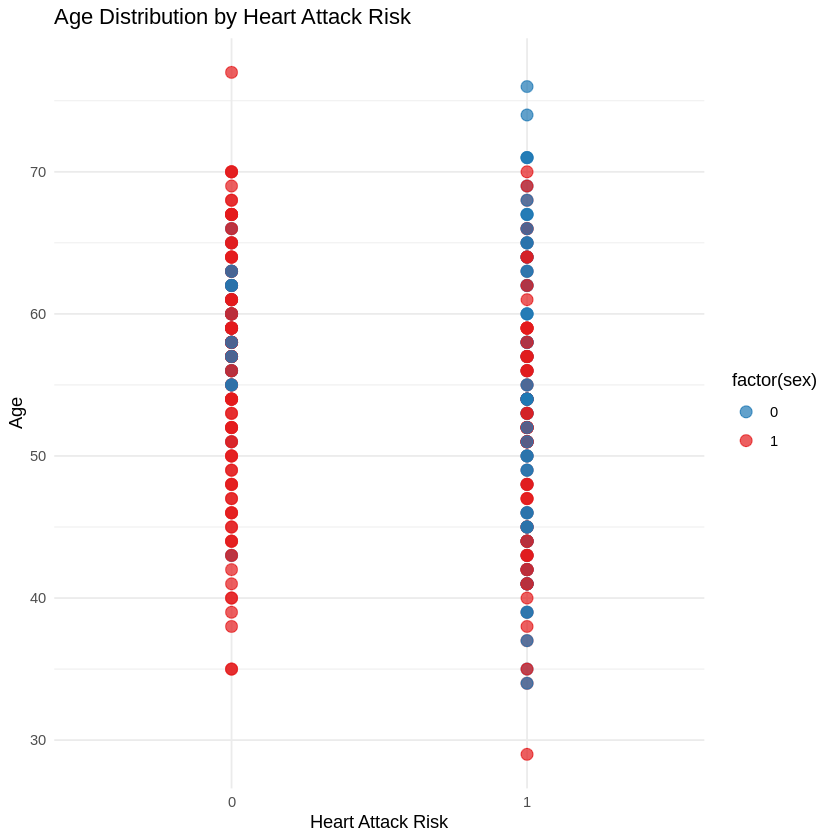

In [ ]:
# Assuming df is your data frame and age is the "age" column, output is the "output" column
library(ggplot2)

ggplot(df, aes(x = factor(output), y = age, color = factor(sex))) +
  geom_point(size = 3, alpha = 0.7) +
  labs(title = "Age Distribution by Heart Attack Risk", y = "Age", x = "Heart Attack Risk") +
  scale_color_manual(values = c("#1F78B4", "#E41A1C")) +  # Blue for 0, Red for 1
  theme_minimal()

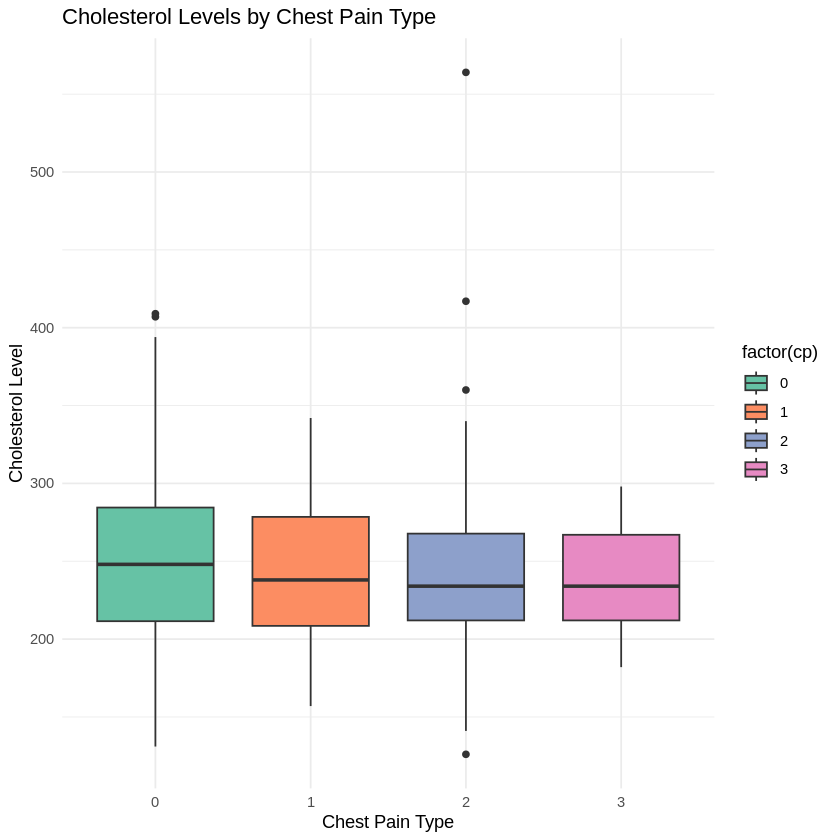

In [ ]:
# Load necessary libraries
library(ggplot2)

# Create a boxplot
ggplot(df, aes(x = factor(cp), y = chol, fill = factor(cp))) +
  geom_boxplot() +
  labs(title = "Cholesterol Levels by Chest Pain Type", y = "Cholesterol Level", x = "Chest Pain Type") +
  scale_fill_manual(values = c("#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3")) +  # Custom colors for each chest pain type
  theme_minimal()

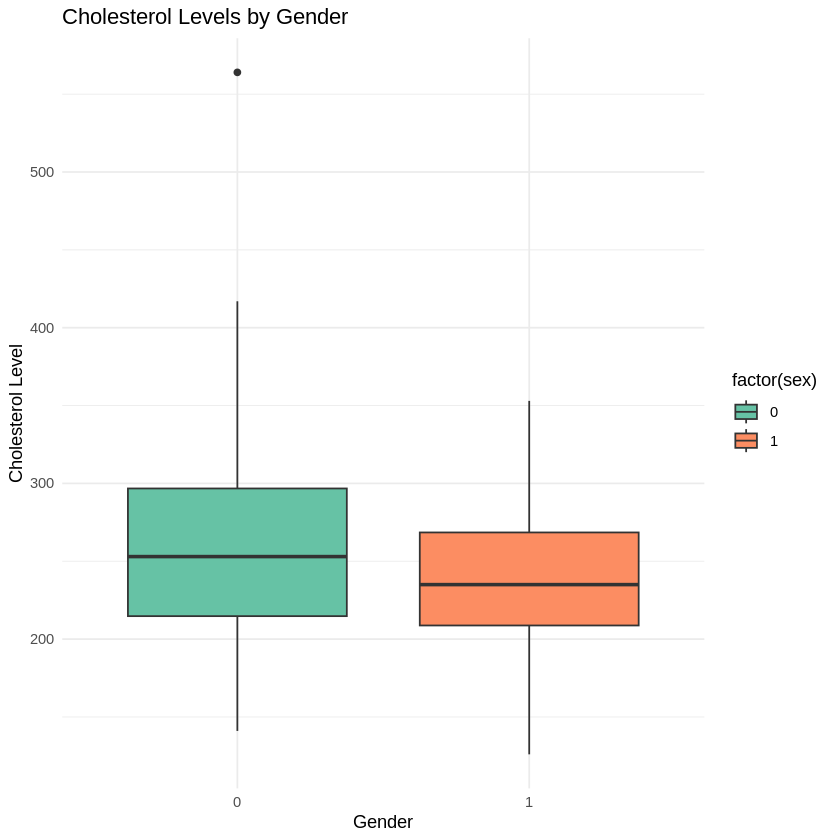

In [ ]:
# Create a boxplot
ggplot(df, aes(x = factor(sex), y = chol, fill = factor(sex))) +
  geom_boxplot() +
  labs(title = "Cholesterol Levels by Gender", y = "Cholesterol Level", x = "Gender") +
  scale_fill_manual(values = c("#66c2a5", "#fc8d62")) +  # Custom colors for each gender
  theme_minimal()

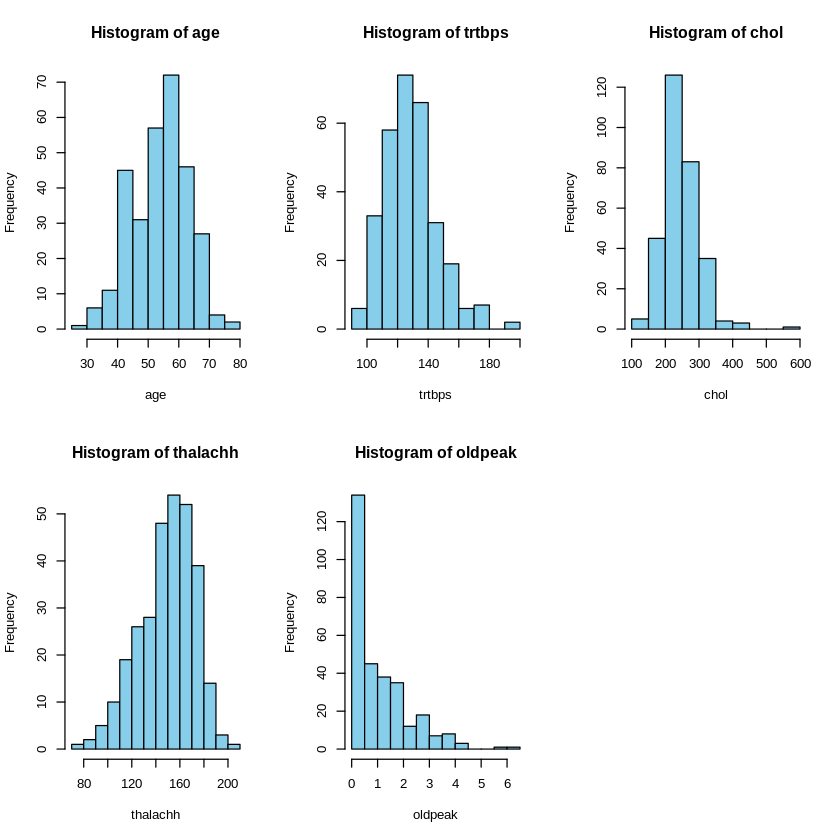

In [ ]:
# Numeric features
numeric_features <- c('age', 'trtbps', 'chol', 'thalachh', 'oldpeak')

# Create a histogram
par(mfrow=c(2, 3))  # Setting up a 2x3 grid for subplots
for (feature in numeric_features) {
  hist(df[[feature]], main = paste("Histogram of", feature), xlab = feature, col = "#87CEEB", border = "black", breaks = 15)
}

In [ ]:
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape’




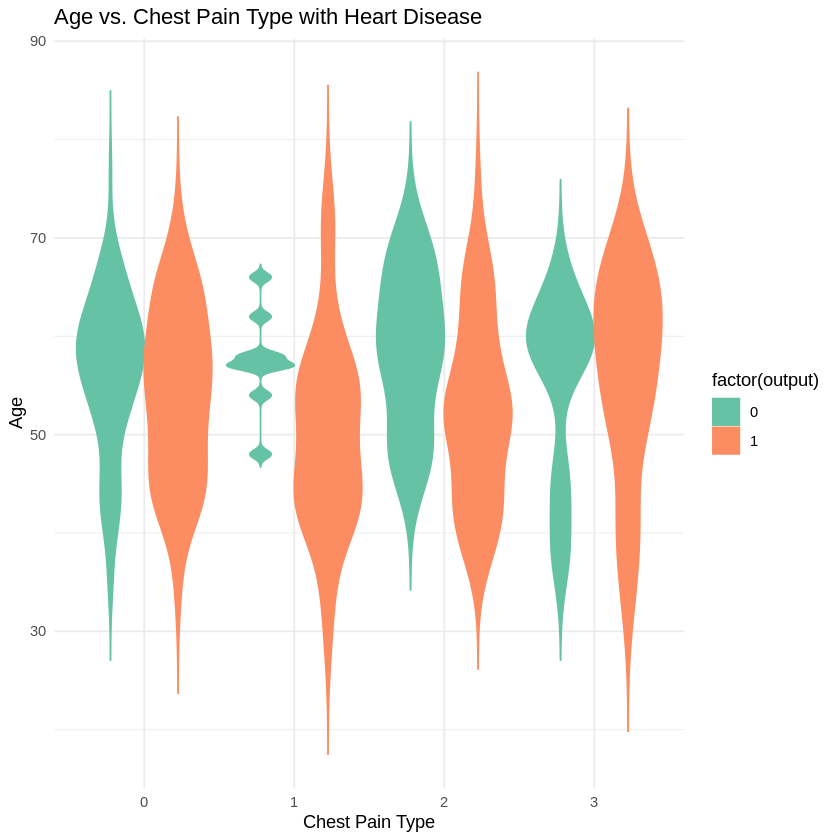

In [ ]:
# Create a violin plot with ggplot2
ggplot(df, aes(x = factor(cp), y = age, fill = factor(output), color = factor(output))) +
  geom_violin(trim = FALSE, scale = "width") +
  labs(title = "Age vs. Chest Pain Type with Heart Disease", x = "Chest Pain Type", y = "Age") +
  scale_fill_manual(values = c("#66c2a5", "#fc8d62")) +  # Custom colors for output
  scale_color_manual(values = c("#66c2a5", "#fc8d62")) +  # Custom colors for output
  theme_minimal()

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


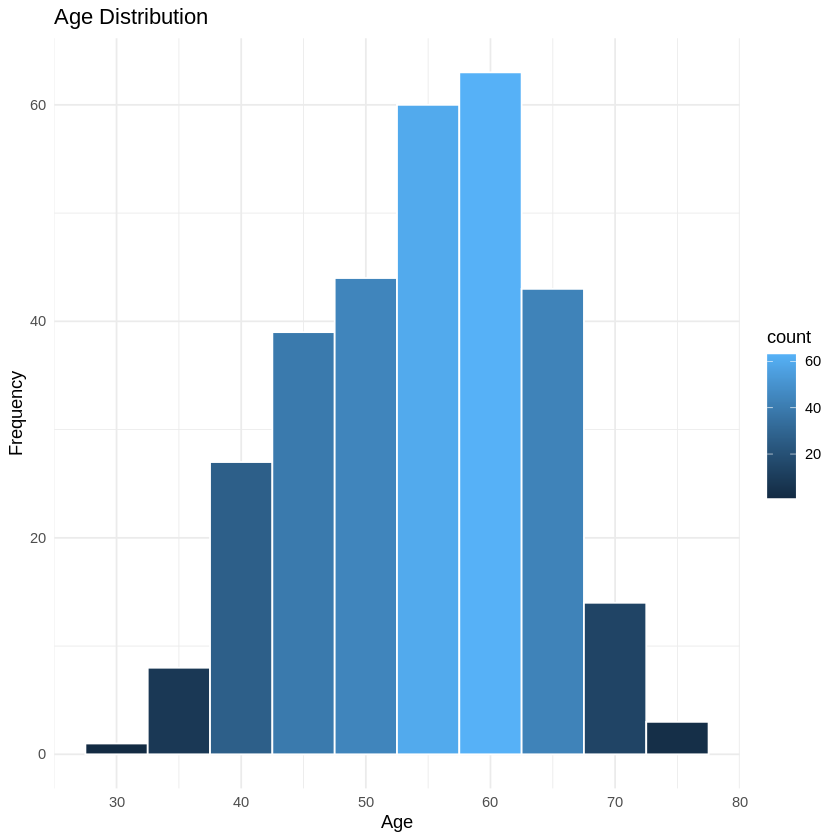

In [ ]:
# Create a histogram with ggplot2
ggplot(df, aes(x = age, fill = ..count..)) +
  geom_histogram(binwidth = 5, color = 'white', position = 'identity') +
  labs(title = 'Age Distribution', x = 'Age', y = 'Frequency') +
  theme_minimal()

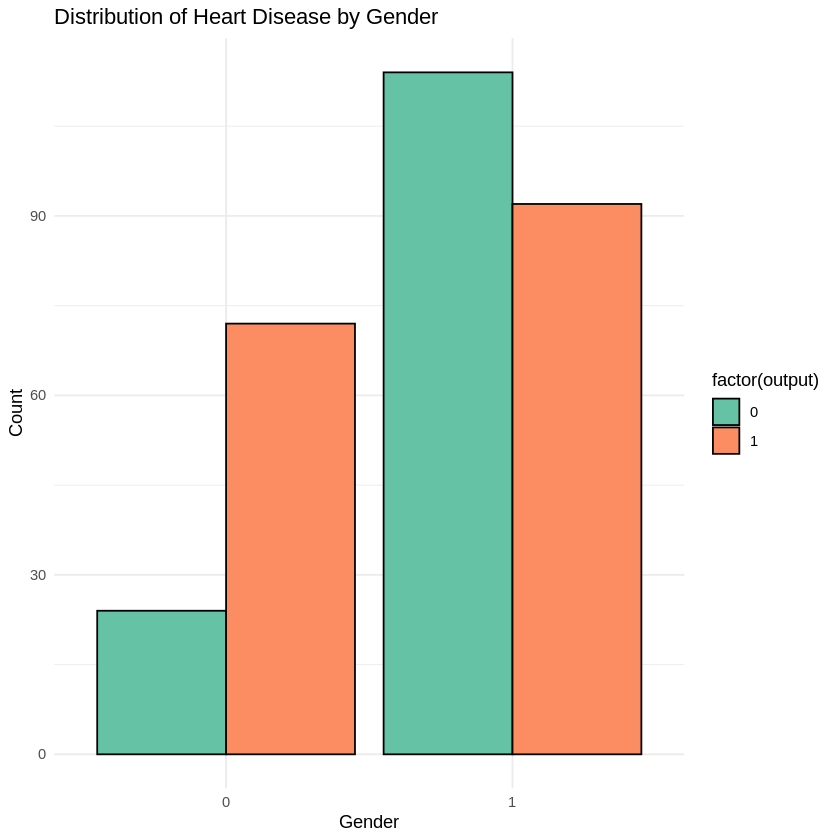

In [ ]:
# Create a Bar Plot
ggplot(df, aes(x = sex, fill = factor(output))) +
  geom_bar(position = "dodge", color = "black") +
  labs(title = "Distribution of Heart Disease by Gender", x = "Gender", y = "Count") +
  scale_fill_manual(values = c("#66c2a5", "#fc8d62")) +  # Custom colors for each output level
  theme_minimal()

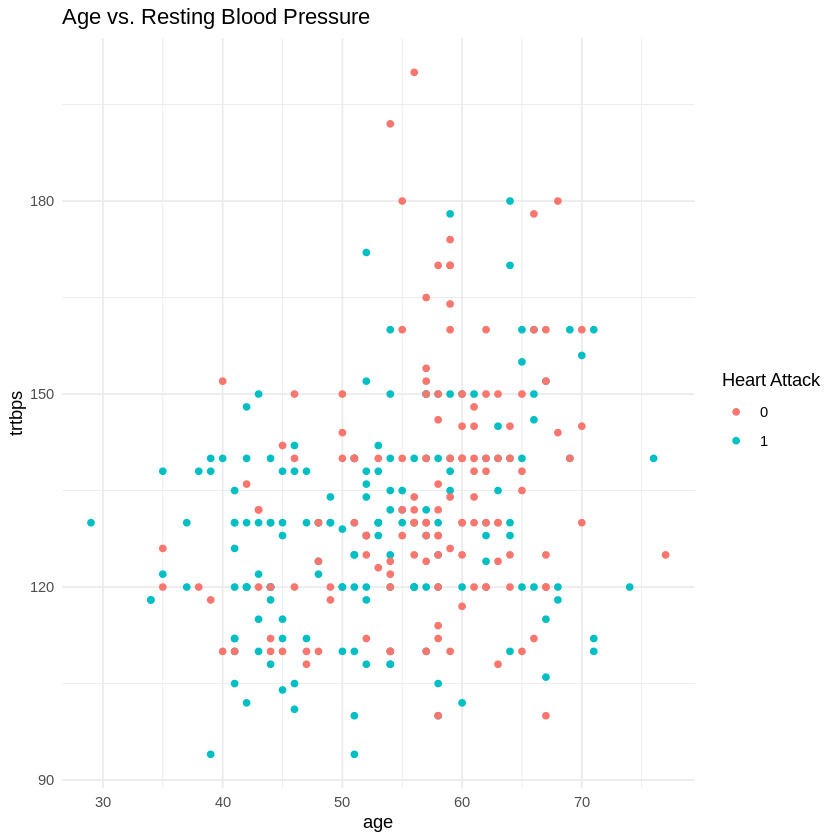

In [ ]:
#Age vs. Resting Blood Pressure (Trtbps):
ggplot(df, aes(x = age, y = trtbps, color = factor(output))) +
  geom_point() +
  labs(title = "Age vs. Resting Blood Pressure", color = "Heart Attack") +
  theme_minimal()

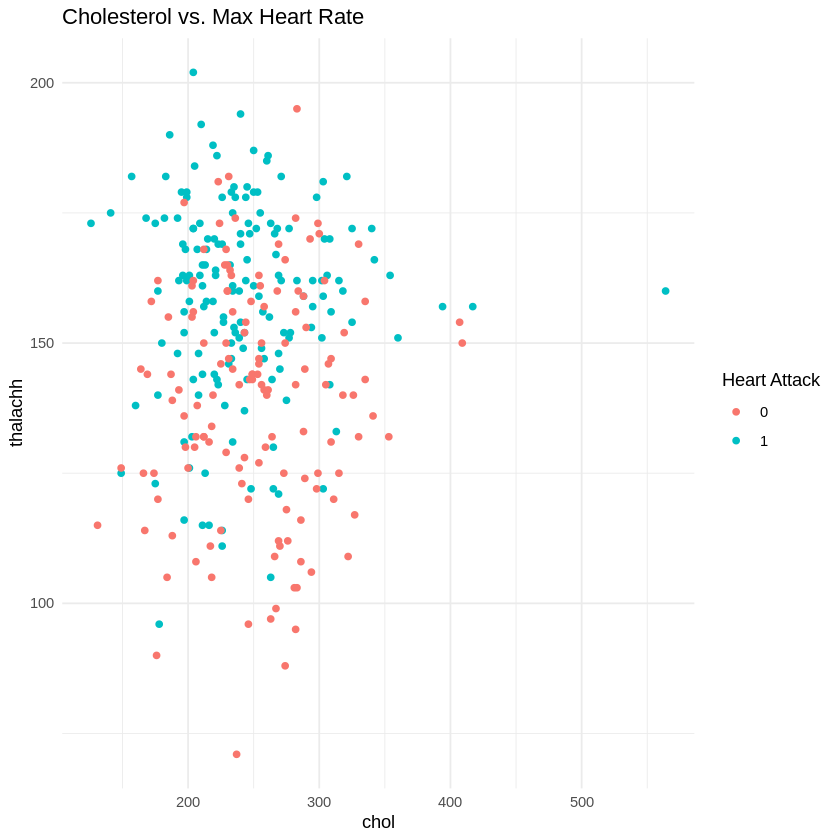

In [ ]:
#Serum Cholesterol Level (Chol) vs. Maximum Heart Rate (Thalachh)
ggplot(df, aes(x = chol, y = thalachh, color = factor(output))) +
  geom_point() +
  labs(title = "Cholesterol vs. Max Heart Rate", color = "Heart Attack") +
  theme_minimal()

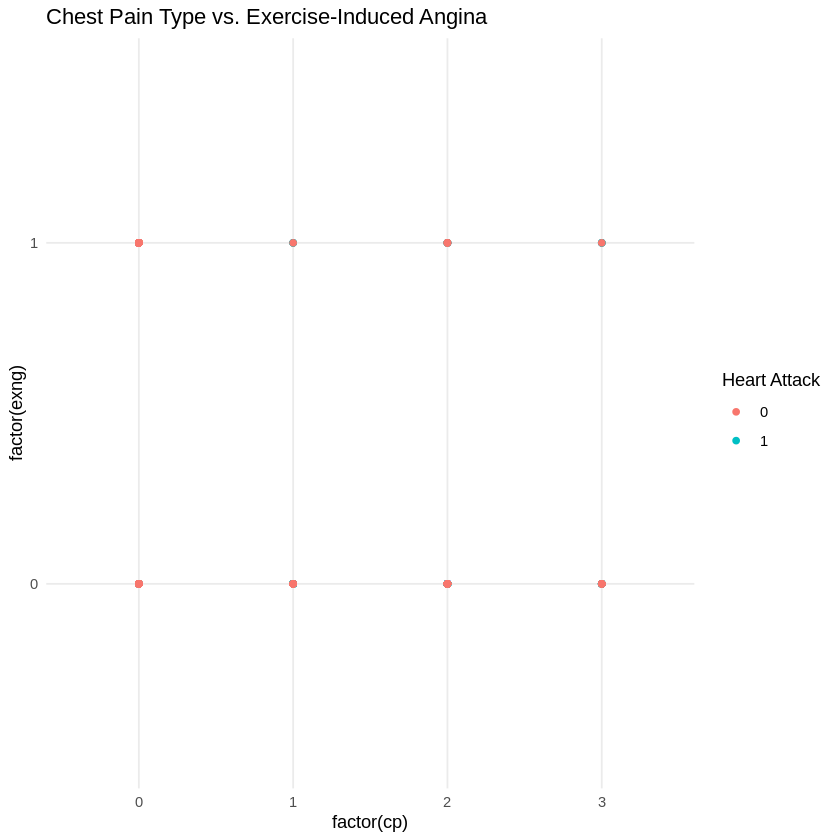

In [ ]:
#Chest Pain Type (Cp) vs. Exercise-Induced Angina (Exng)
ggplot(df, aes(x = factor(cp), y = factor(exng), color = factor(output))) +
  geom_point() +
  labs(title = "Chest Pain Type vs. Exercise-Induced Angina", color = "Heart Attack") +
  theme_minimal()

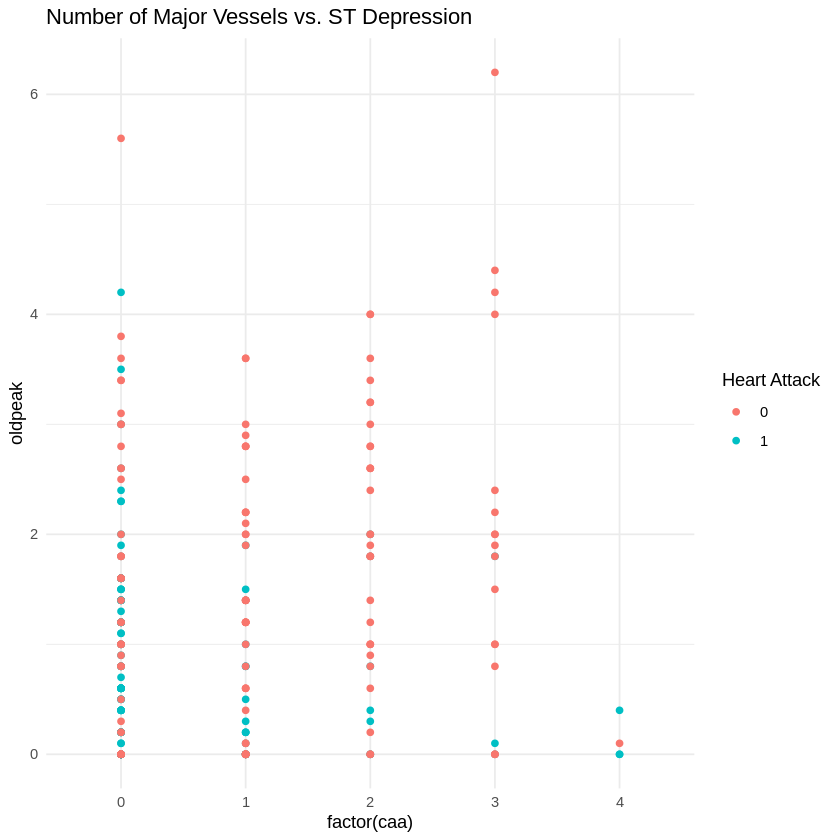

In [ ]:
#Number of Major Vessels (Caa) vs. ST Depression (Oldpeak)
ggplot(df, aes(x = factor(caa), y = oldpeak, color = factor(output))) +
  geom_point() +
  labs(title = "Number of Major Vessels vs. ST Depression", color = "Heart Attack") +
  theme_minimal()

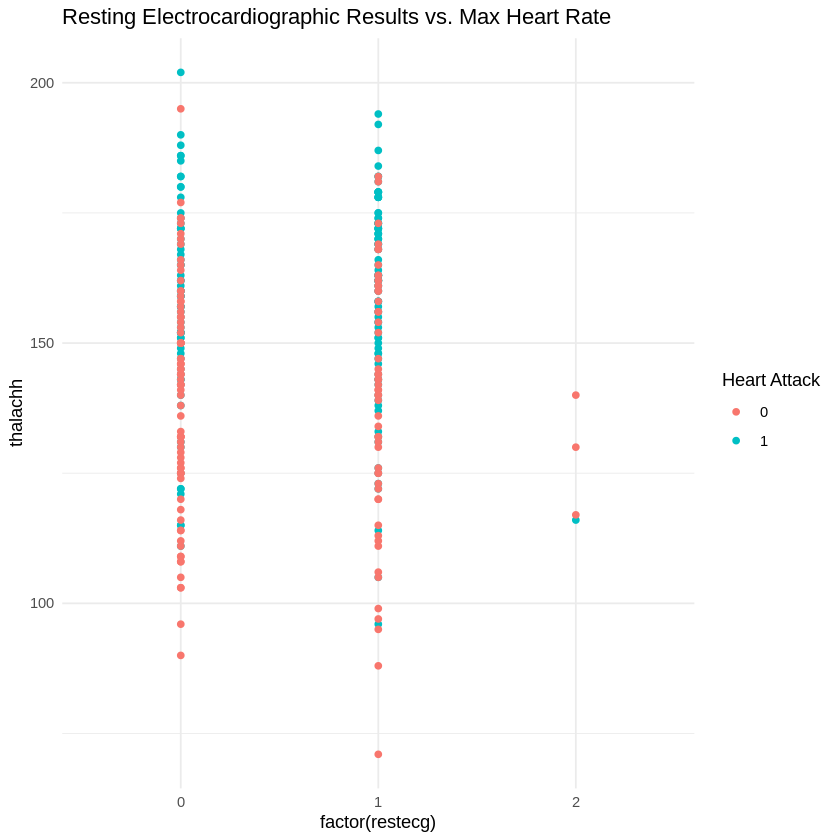

In [ ]:
#Resting Electrocardiographic Results (Restecg) vs. Maximum Heart Rate (Thalach)
ggplot(df, aes(x = factor(restecg), y = thalachh, color = factor(output))) +
  geom_point() +
  labs(title = "Resting Electrocardiographic Results vs. Max Heart Rate", color = "Heart Attack") +
  theme_minimal()

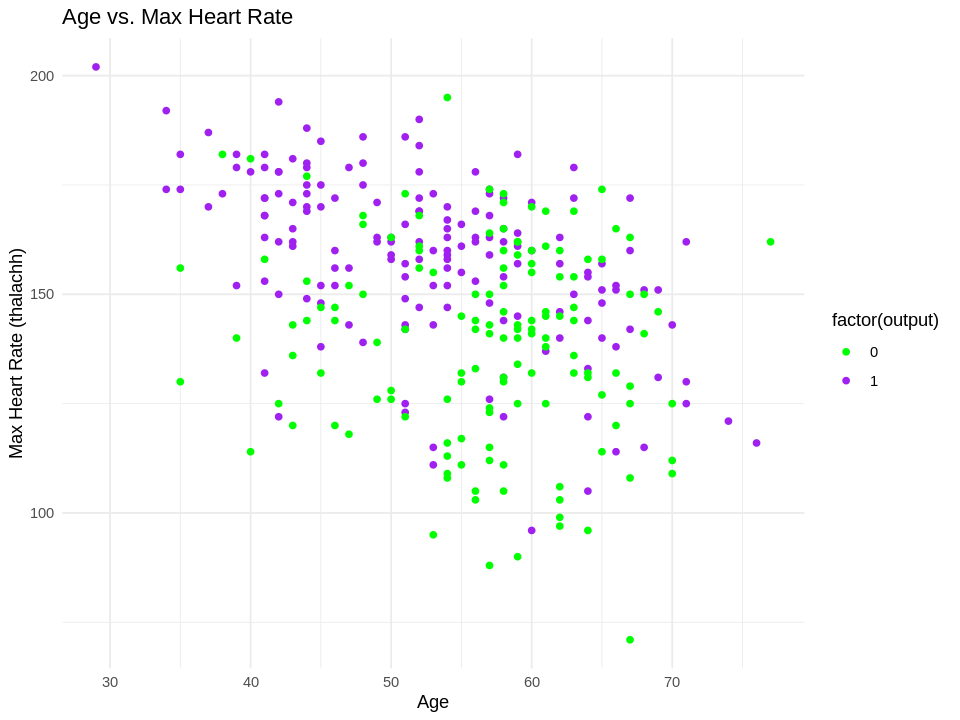

In [ ]:
# Set the size of the plot
options(repr.plot.width=8, repr.plot.height=6)

# Create the scatter plot
ggplot(df, aes(x = age, y = thalachh, color = factor(output))) +
  geom_point() +
  labs(x = 'Age', y = 'Max Heart Rate (thalachh)', title = 'Age vs. Max Heart Rate') +
  scale_color_manual(values = c("0" = "green", "1" = "purple")) +
  theme_minimal()

In [ ]:
#Age Box Plot
ggplot(df, aes(x = "", y = age, fill = factor(output))) +
  geom_boxplot() +
  labs(title = "Boxplot of Age by Heart Attack Status", x = "", y = "Age") +
  theme_minimal() +
  scale_fill_manual(values = c("0" = "lightcoral", "1" = "lightskyblue"))


ERROR: ignored

In [ ]:
#Resting Blood Pressure (Trestbps) Box Plot
ggplot(df, aes(x = "", y = trtbps, fill = factor(output))) +
  geom_boxplot() +
  labs(title = "Boxplot of Resting Blood Pressure by Heart Attack Status", x = "", y = "Resting Blood Pressure") +
  theme_minimal() +
  scale_fill_manual(values = c("0" = "lightcoral", "1" = "lightskyblue"))

ERROR: ignored

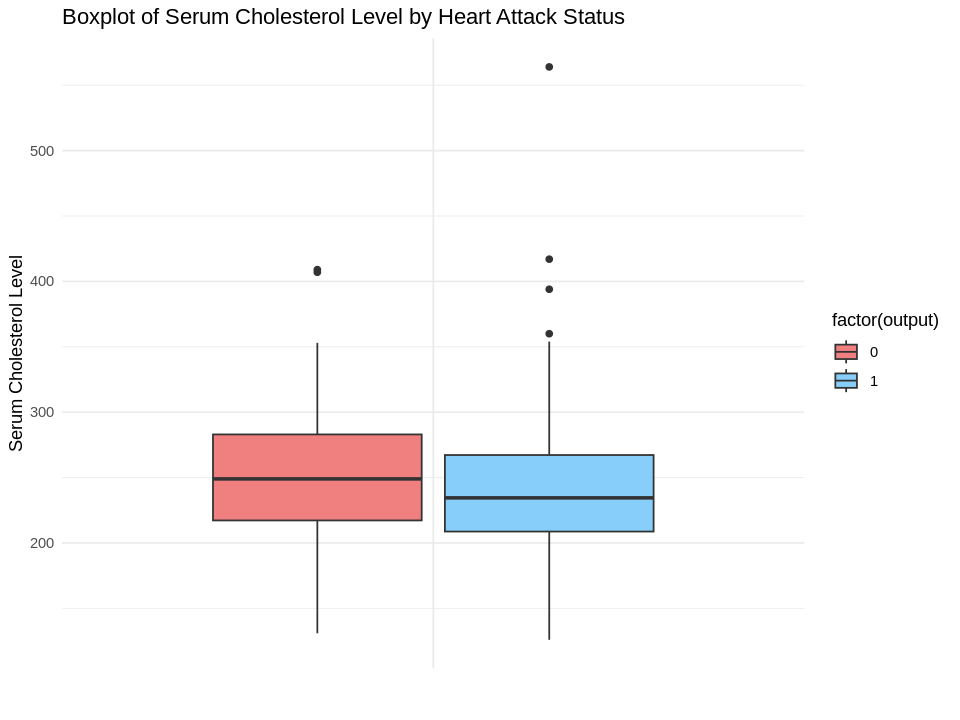

In [ ]:
#Serum Cholesterol Level (Chol) Box Plot
ggplot(df, aes(x = "", y = chol, fill = factor(output))) +
  geom_boxplot() +
  labs(title = "Boxplot of Serum Cholesterol Level by Heart Attack Status", x = "", y = "Serum Cholesterol Level") +
  theme_minimal() +
  scale_fill_manual(values = c("0" = "lightcoral", "1" = "lightskyblue"))

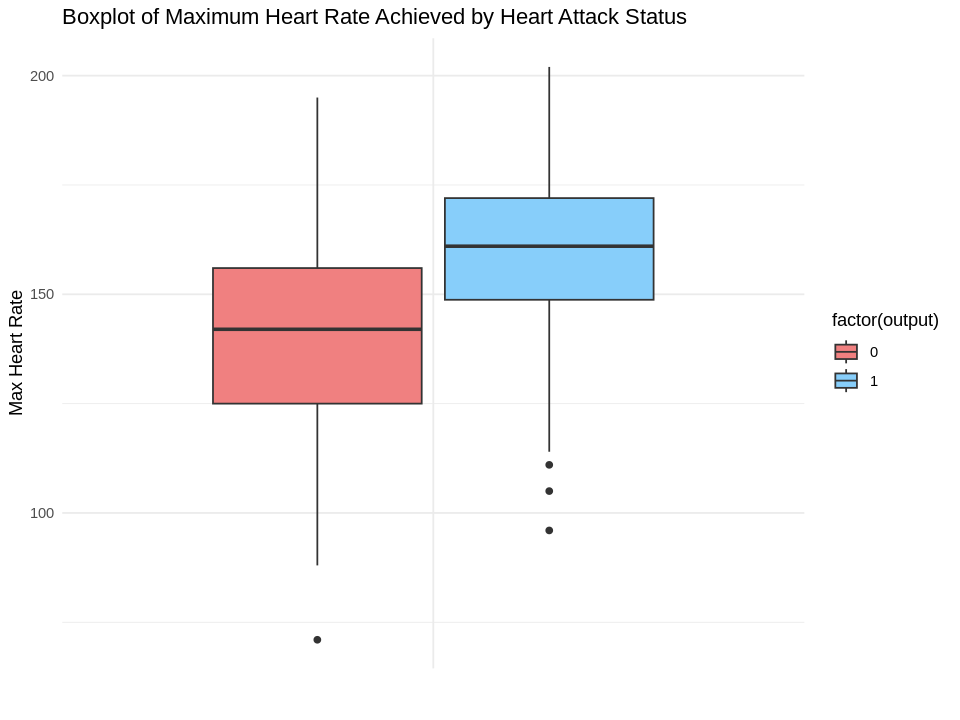

In [ ]:
#Maximum Heart Rate Achieved (Thalach) Box Plot
ggplot(df, aes(x = "", y = thalachh, fill = factor(output))) +
  geom_boxplot() +
  labs(title = "Boxplot of Maximum Heart Rate Achieved by Heart Attack Status", x = "", y = "Max Heart Rate") +
  theme_minimal() +
  scale_fill_manual(values = c("0" = "lightcoral", "1" = "lightskyblue"))

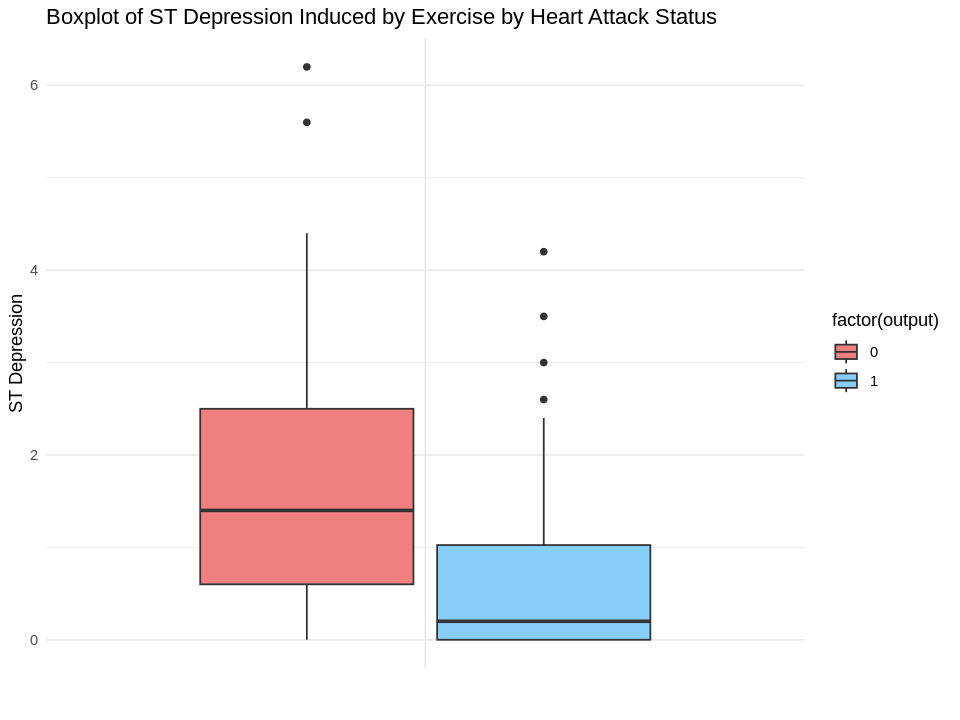

In [ ]:
#ST Depression Induced by Exercise (Oldpeak) Box Plot
ggplot(df, aes(x = "", y = oldpeak, fill = factor(output))) +
  geom_boxplot() +
  labs(title = "Boxplot of ST Depression Induced by Exercise by Heart Attack Status", x = "", y = "ST Depression") +
  theme_minimal() +
  scale_fill_manual(values = c("0" = "lightcoral", "1" = "lightskyblue"))


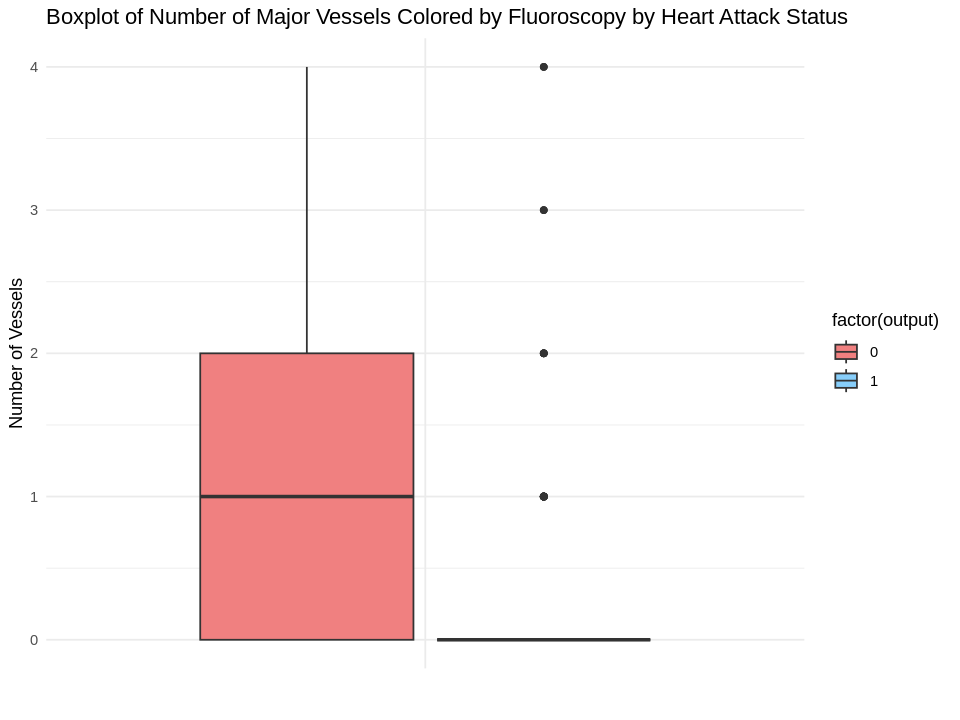

In [ ]:
#Number of Major Vessels Colored by Fluoroscopy (Ca) Box Plot
ggplot(df, aes(x = "", y = caa, fill = factor(output))) +
  geom_boxplot() +
  labs(title = "Boxplot of Number of Major Vessels Colored by Fluoroscopy by Heart Attack Status", x = "", y = "Number of Vessels") +
  theme_minimal() +
  scale_fill_manual(values = c("0" = "lightcoral", "1" = "lightskyblue"))


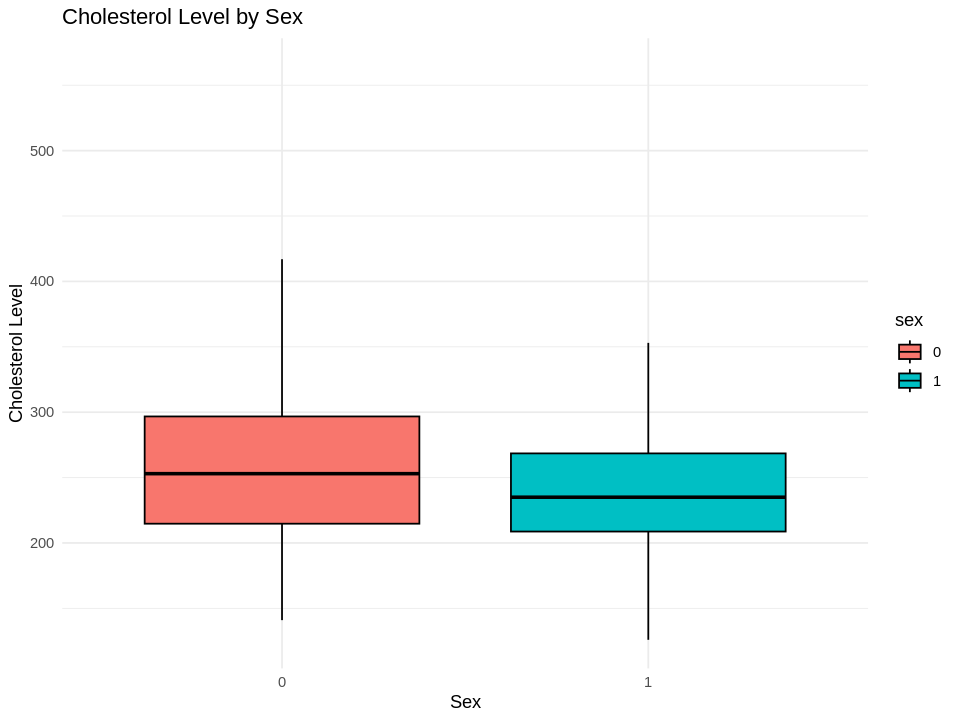

In [ ]:
# Assuming df is your data frame
library(ggplot2)

# Create a boxplot
ggplot(df, aes(x = sex, y = chol, fill = sex)) +
  geom_boxplot(color = "black", outlier.shape = NA) +  # Hide outliers for better visibility
  labs(title = "Cholesterol Level by Sex", x = "Sex", y = "Cholesterol Level") +
  theme_minimal()


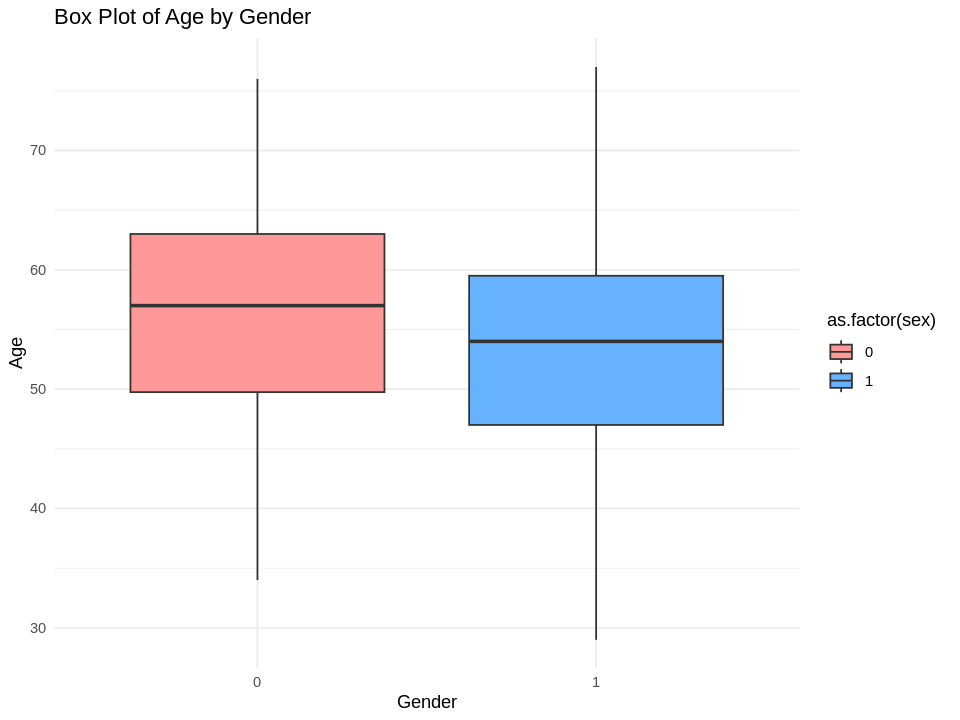

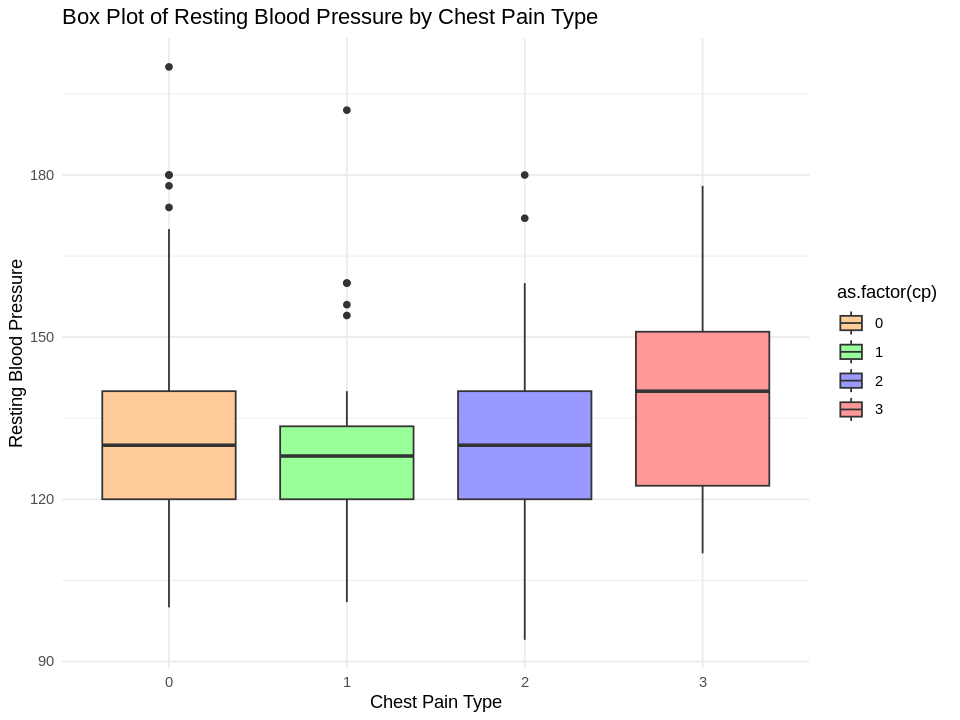

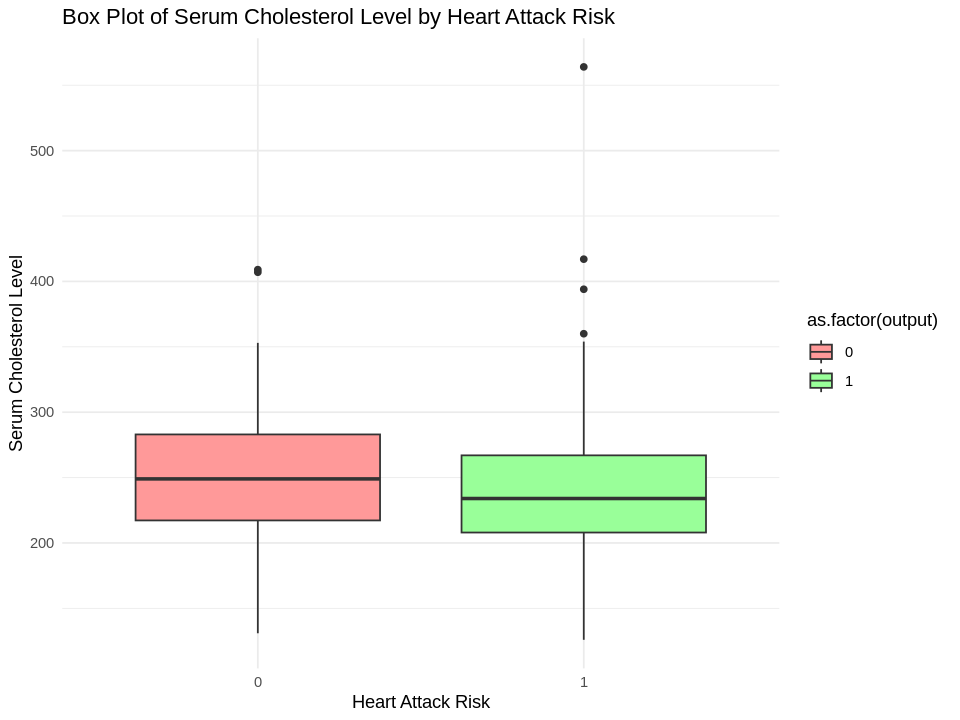

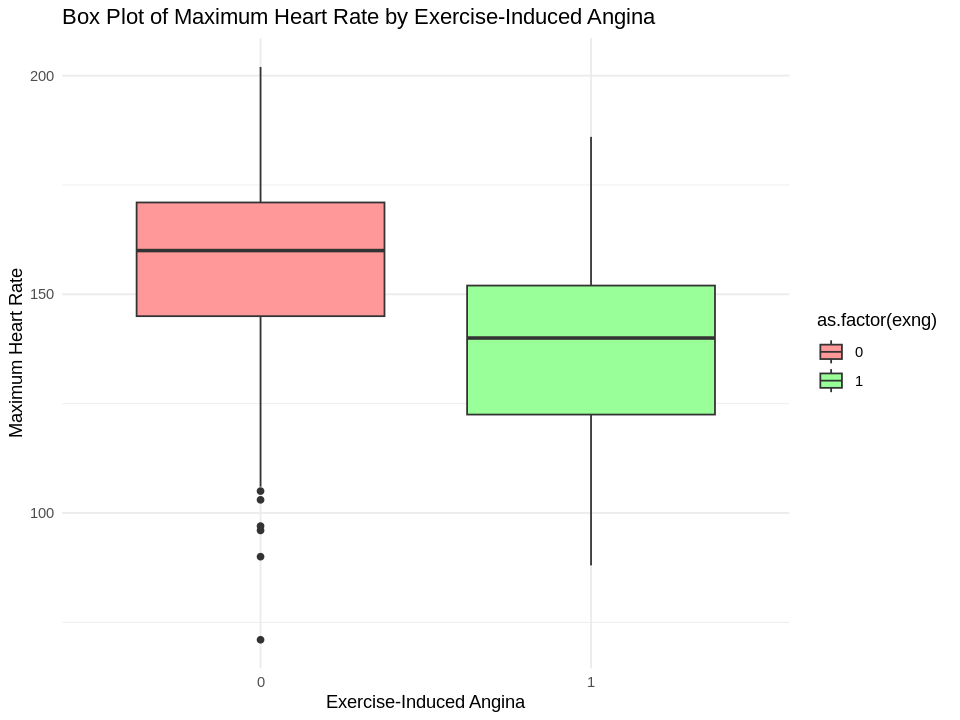

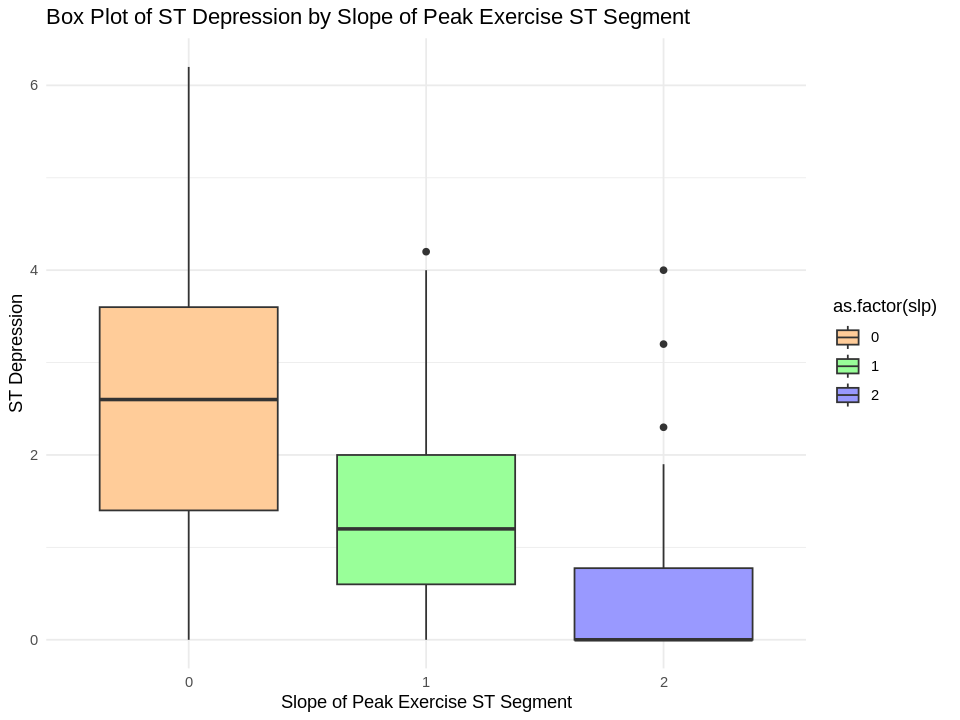

In [ ]:
# Load necessary libraries
library(ggplot2)

# Load the CSV file
df <- read.csv("heart.csv")

# Box plot for Age by Gender
ggplot(df, aes(x = as.factor(sex), y = age, fill = as.factor(sex))) +
  geom_boxplot() +
  labs(x = "Gender", y = "Age", title = "Box Plot of Age by Gender") +
  theme_minimal() +
  scale_fill_manual(values = c("#FF9999", "#66B2FF"))

# Box plot for Resting Blood Pressure by Chest Pain Type
ggplot(df, aes(x = as.factor(cp), y = trtbps, fill = as.factor(cp))) +
  geom_boxplot() +
  labs(x = "Chest Pain Type", y = "Resting Blood Pressure", title = "Box Plot of Resting Blood Pressure by Chest Pain Type") +
  theme_minimal() +
  scale_fill_manual(values = c("#FFCC99", "#99FF99", "#9999FF", "#FF9999"))

# Box plot for Serum Cholesterol Level by Heart Attack Risk
ggplot(df, aes(x = as.factor(output), y = chol, fill = as.factor(output))) +
  geom_boxplot() +
  labs(x = "Heart Attack Risk", y = "Serum Cholesterol Level", title = "Box Plot of Serum Cholesterol Level by Heart Attack Risk") +
  theme_minimal() +
  scale_fill_manual(values = c("#FF9999", "#99FF99"))



# Box plot for Maximum Heart Rate by Exercise-Induced Angina
ggplot(df, aes(x = as.factor(exng), y = thalachh, fill = as.factor(exng))) +
  geom_boxplot() +
  labs(x = "Exercise-Induced Angina", y = "Maximum Heart Rate", title = "Box Plot of Maximum Heart Rate by Exercise-Induced Angina") +
  theme_minimal() +
  scale_fill_manual(values = c("#FF9999", "#99FF99"))

# Box plot for ST Depression by Slope of the Peak Exercise ST Segment
ggplot(df, aes(x = as.factor(slp), y = oldpeak, fill = as.factor(slp))) +
  geom_boxplot() +
  labs(x = "Slope of Peak Exercise ST Segment", y = "ST Depression", title = "Box Plot of ST Depression by Slope of Peak Exercise ST Segment") +
  theme_minimal() +
  scale_fill_manual(values = c("#FFCC99", "#99FF99", "#9999FF"))


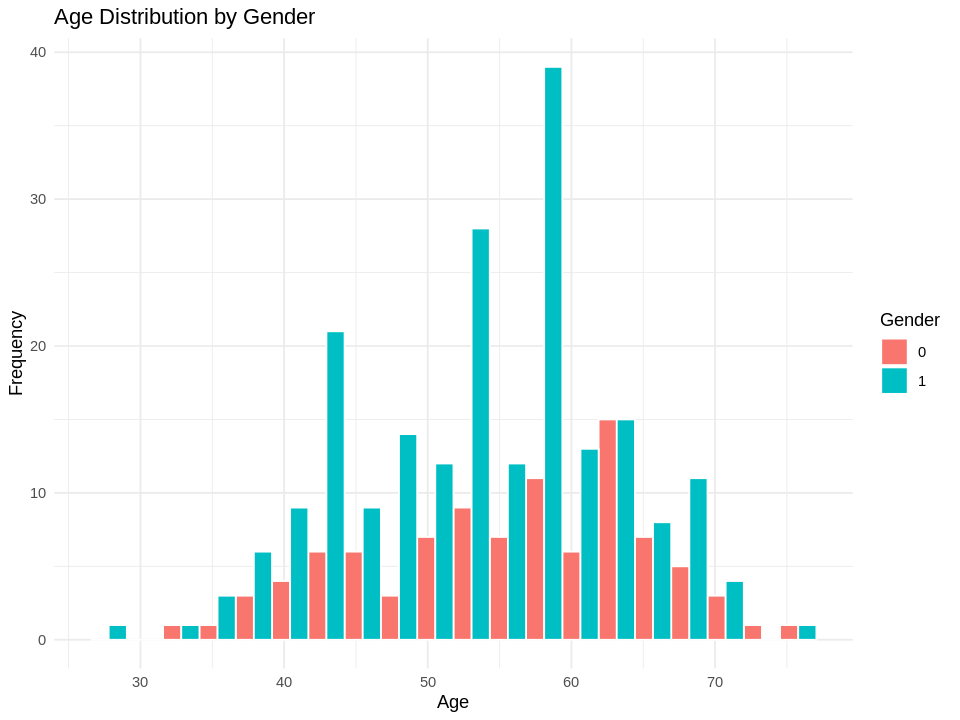

In [ ]:
#Age Distribution by Gender
ggplot(df, aes(x = age, fill = factor(sex))) +
  geom_histogram(position = "dodge", bins = 20, color = 'white') +
  labs(title = 'Age Distribution by Gender', x = 'Age', y = 'Frequency', fill = 'Gender') +
  theme_minimal()


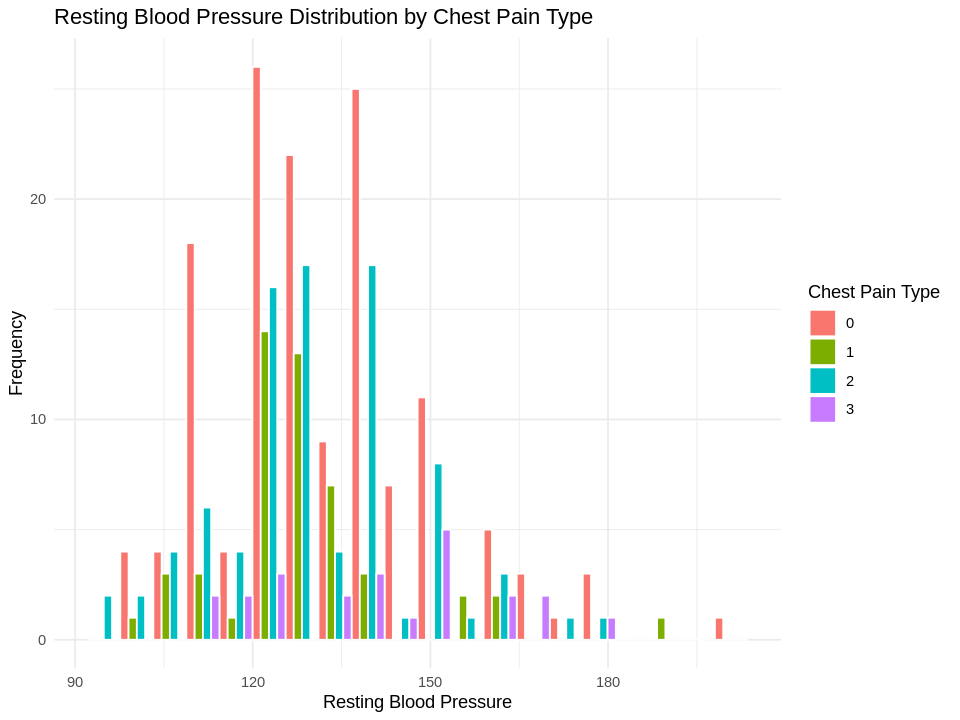

In [ ]:
#Resting Blood Pressure Distribution by Chest Pain Type
ggplot(df, aes(x = trtbps, fill = factor(cp))) +
  geom_histogram(position = "dodge", bins = 20, color = 'white') +
  labs(title = 'Resting Blood Pressure Distribution by Chest Pain Type', x = 'Resting Blood Pressure', y = 'Frequency', fill = 'Chest Pain Type') +
  theme_minimal()


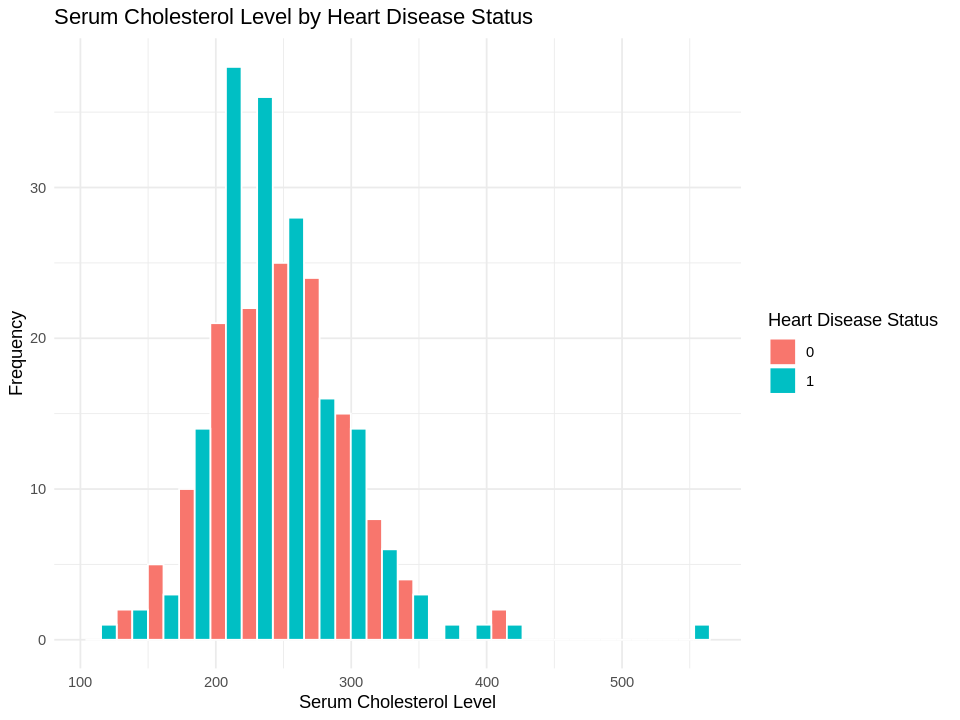

In [ ]:
#Serum Cholesterol Level by Heart Disease Status
ggplot(df, aes(x = chol, fill = factor(output))) +
  geom_histogram(position = "dodge", bins = 20, color = 'white') +
  labs(title = 'Serum Cholesterol Level by Heart Disease Status', x = 'Serum Cholesterol Level', y = 'Frequency', fill = 'Heart Disease Status') +
  theme_minimal()


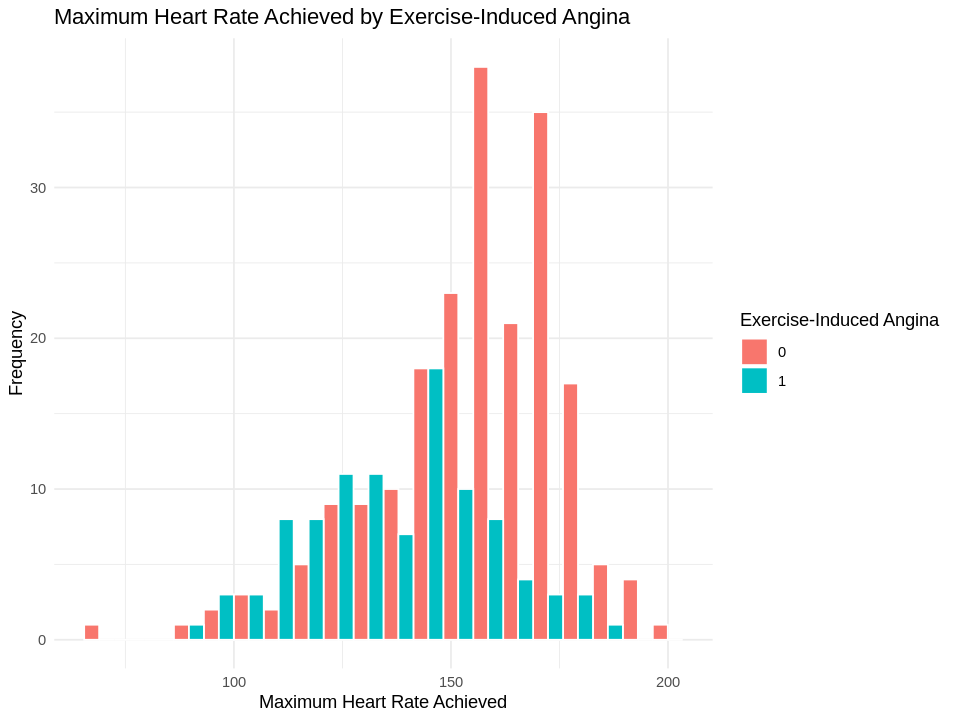

In [ ]:
#Maximum Heart Rate Achieved by Exercise-Induced Angina
ggplot(df, aes(x = thalachh, fill = factor(exng))) +
  geom_histogram(position = "dodge", bins = 20, color = 'white') +
  labs(title = 'Maximum Heart Rate Achieved by Exercise-Induced Angina', x = 'Maximum Heart Rate Achieved', y = 'Frequency', fill = 'Exercise-Induced Angina') +
  theme_minimal()


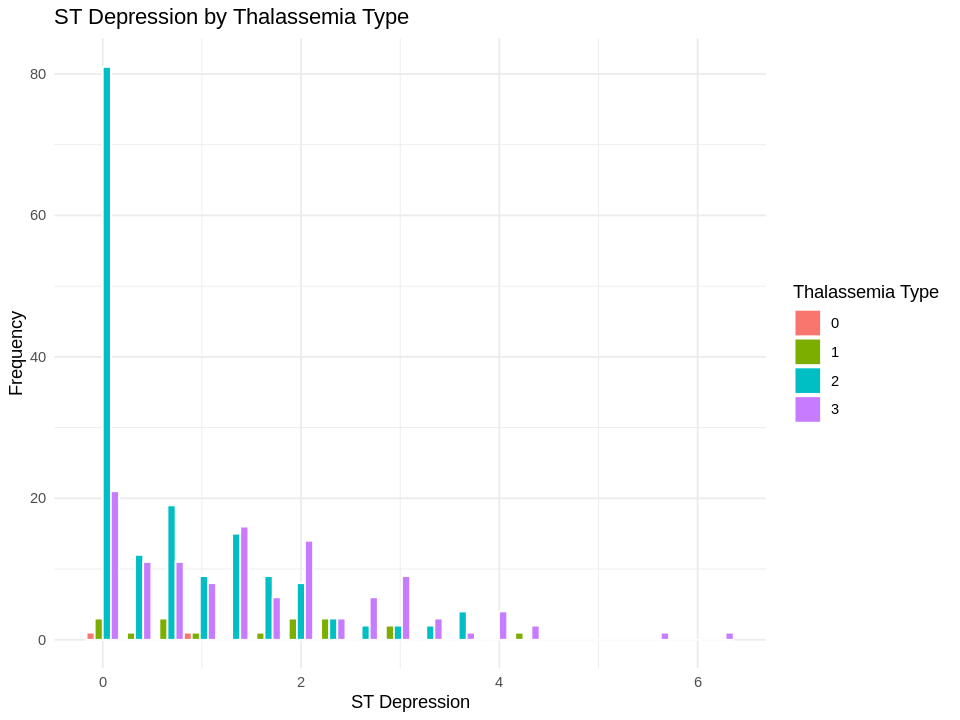

In [ ]:
#ST Depression by Thalassemia Type
ggplot(df, aes(x = oldpeak, fill = factor(thall))) +
  geom_histogram(position = "dodge", bins = 20, color = 'white') +
  labs(title = 'ST Depression by Thalassemia Type', x = 'ST Depression', y = 'Frequency', fill = 'Thalassemia Type') +
  theme_minimal()


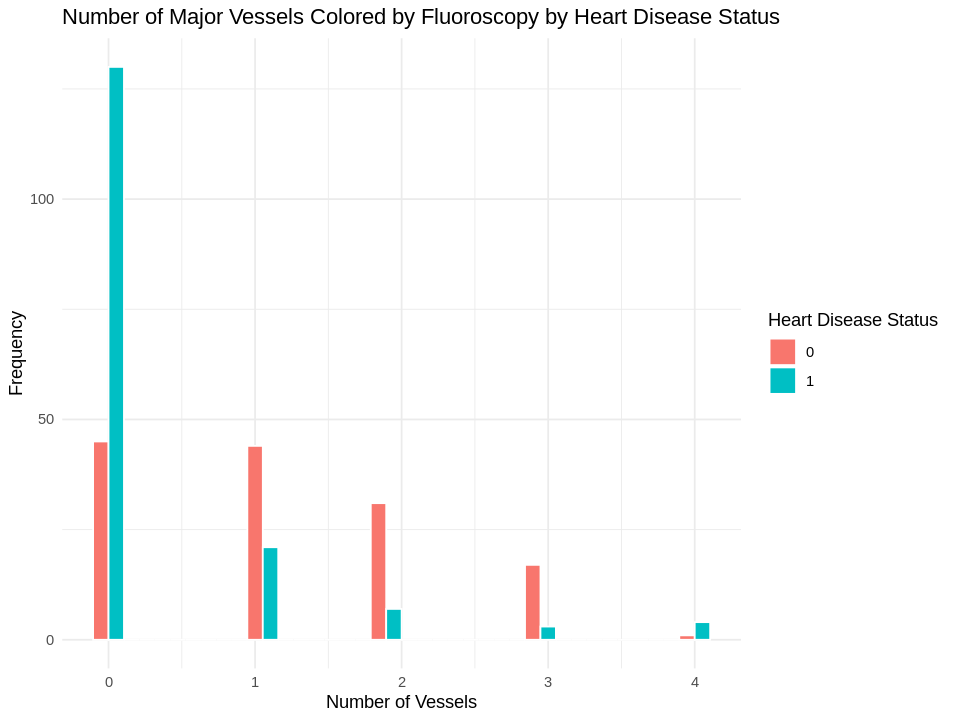

In [ ]:
#Number of Major Vessels Colored by Fluoroscopy by Heart Disease Status
ggplot(df, aes(x = caa, fill = factor(output))) +
  geom_histogram(position = "dodge", bins = 20, color = 'white') +
  labs(title = 'Number of Major Vessels Colored by Fluoroscopy by Heart Disease Status', x = 'Number of Vessels', y = 'Frequency', fill = 'Heart Disease Status') +
  theme_minimal()


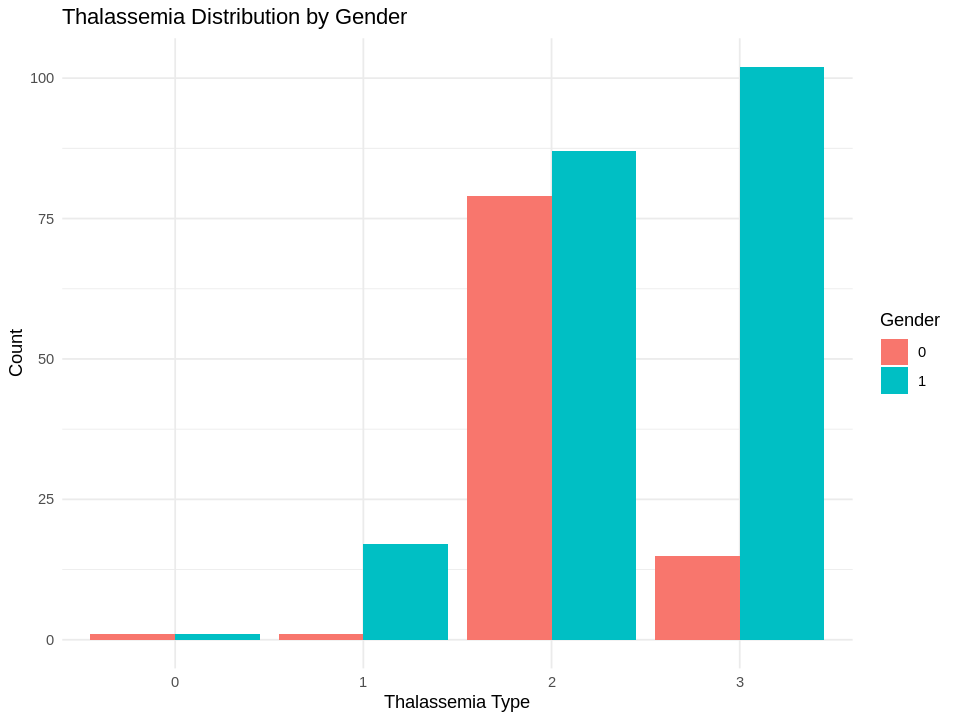

In [ ]:
#Thalassemia Distribution by Gender
ggplot(df, aes(x = factor(thall), fill = factor(sex))) +
  geom_bar(position = "dodge") +
  labs(title = 'Thalassemia Distribution by Gender', x = 'Thalassemia Type', y = 'Count', fill = 'Gender') +
  theme_minimal()


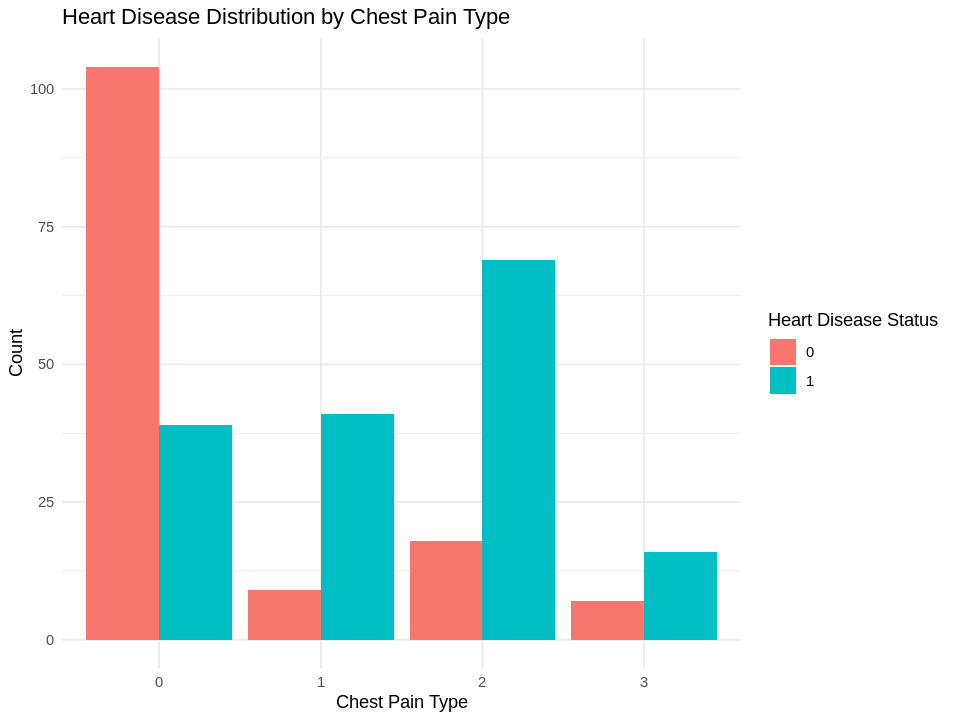

In [ ]:
#Heart Disease Distribution by Chest Pain Type
ggplot(df, aes(x = factor(cp), fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(title = 'Heart Disease Distribution by Chest Pain Type', x = 'Chest Pain Type', y = 'Count', fill = 'Heart Disease Status') +
  theme_minimal()


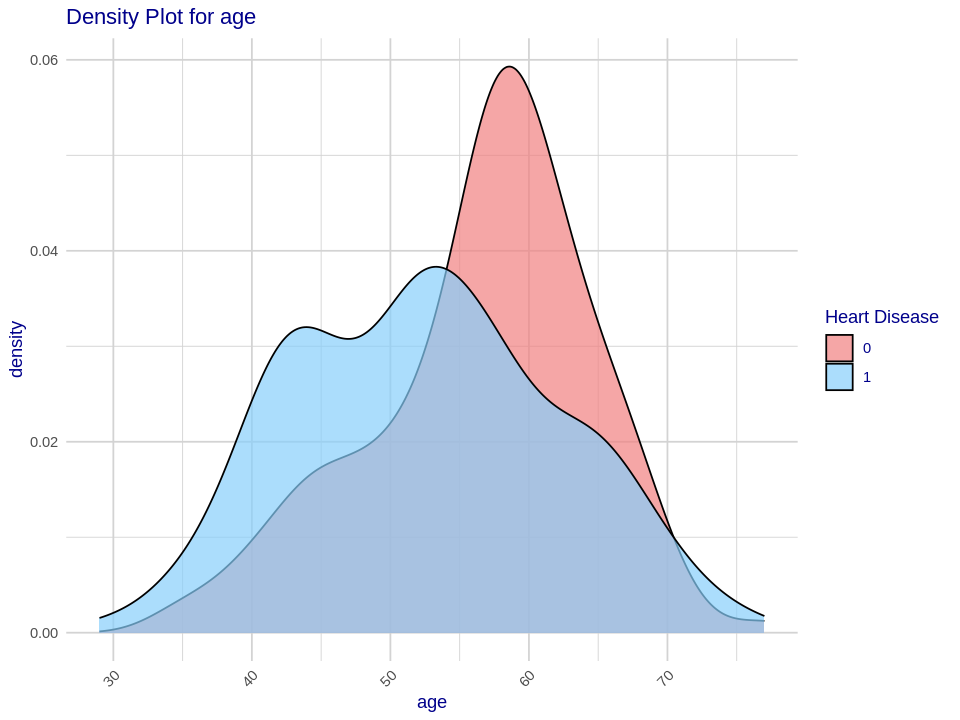

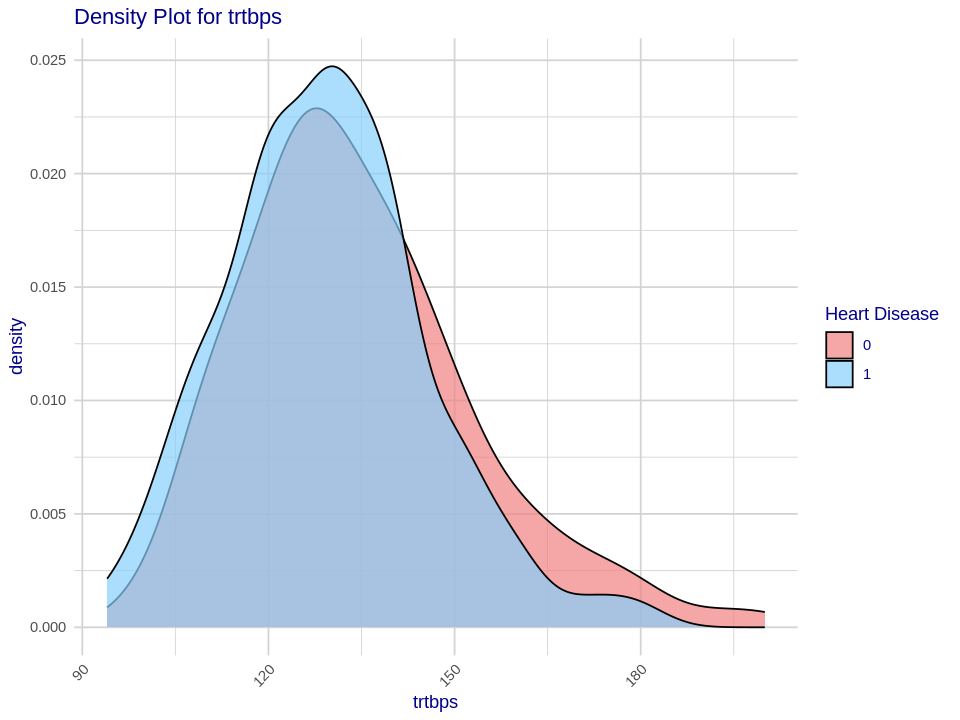

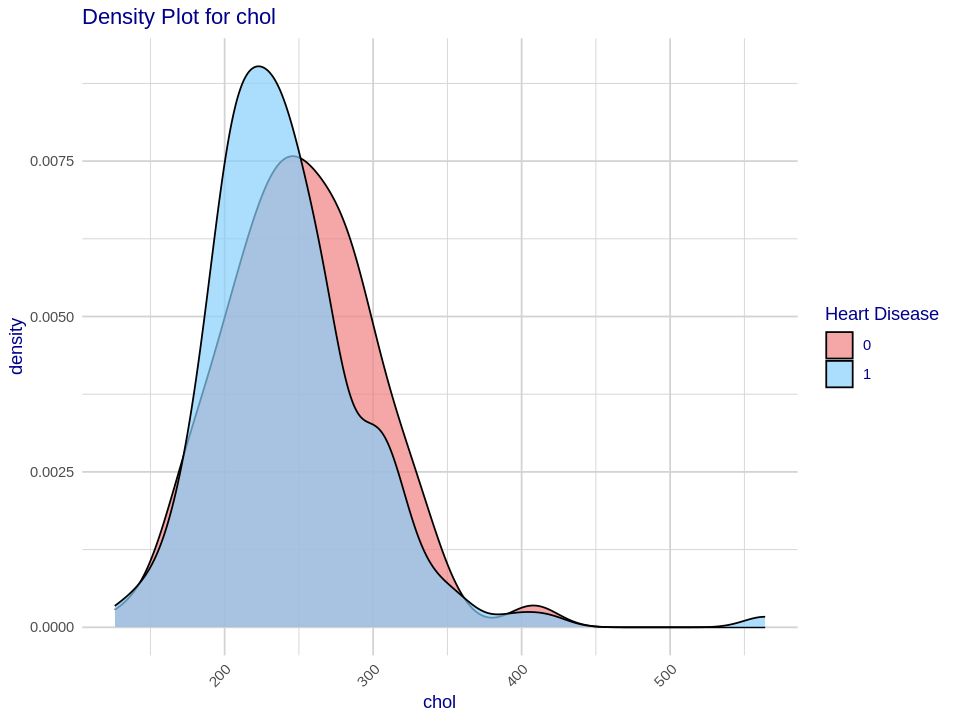

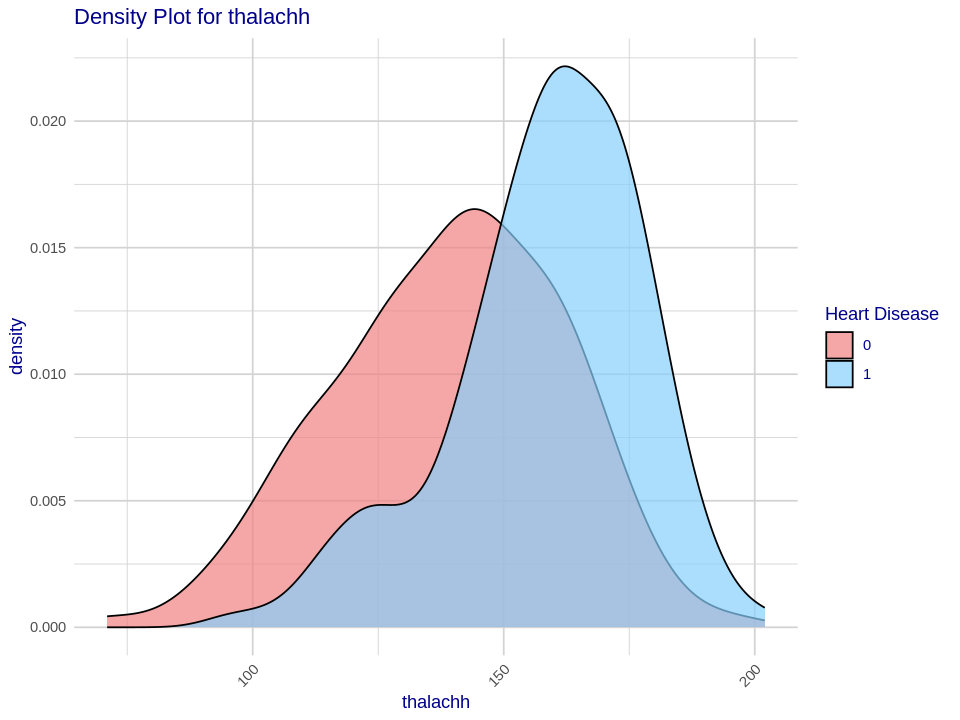

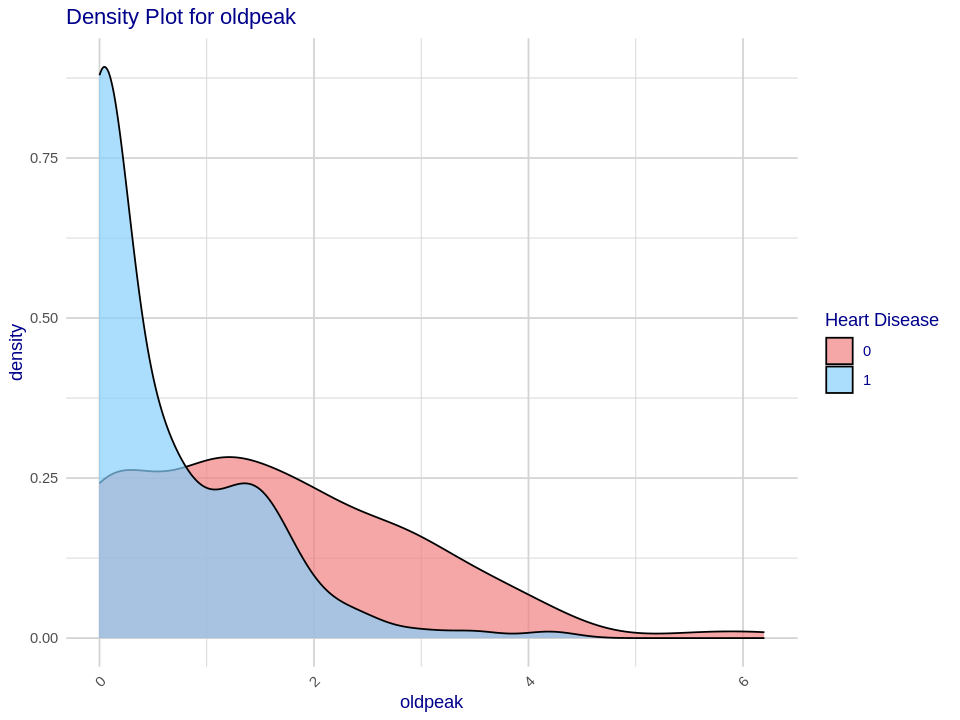

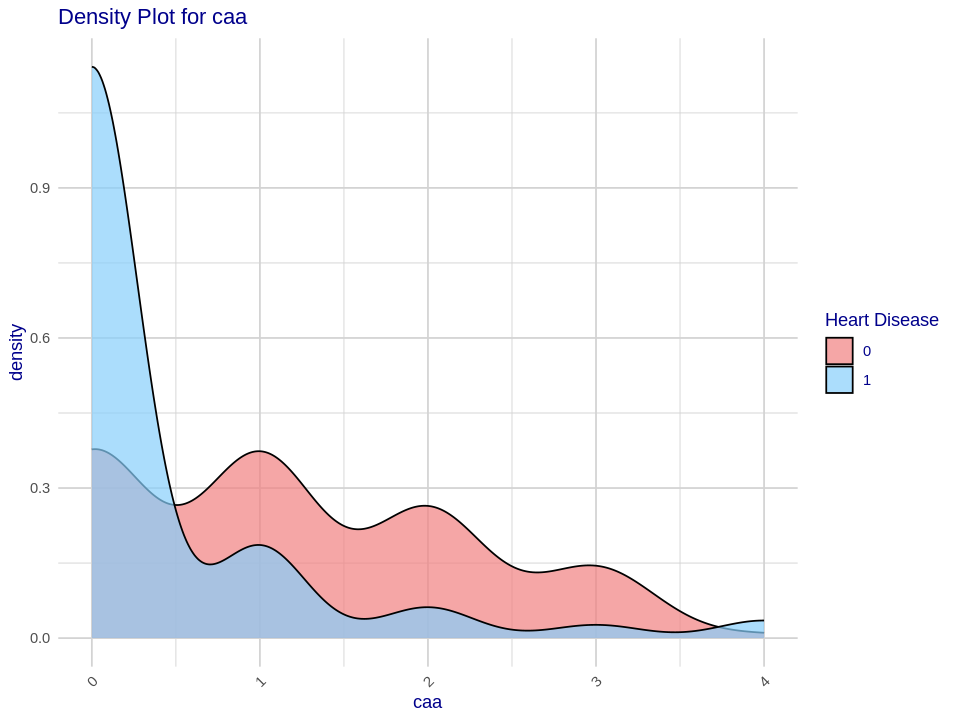

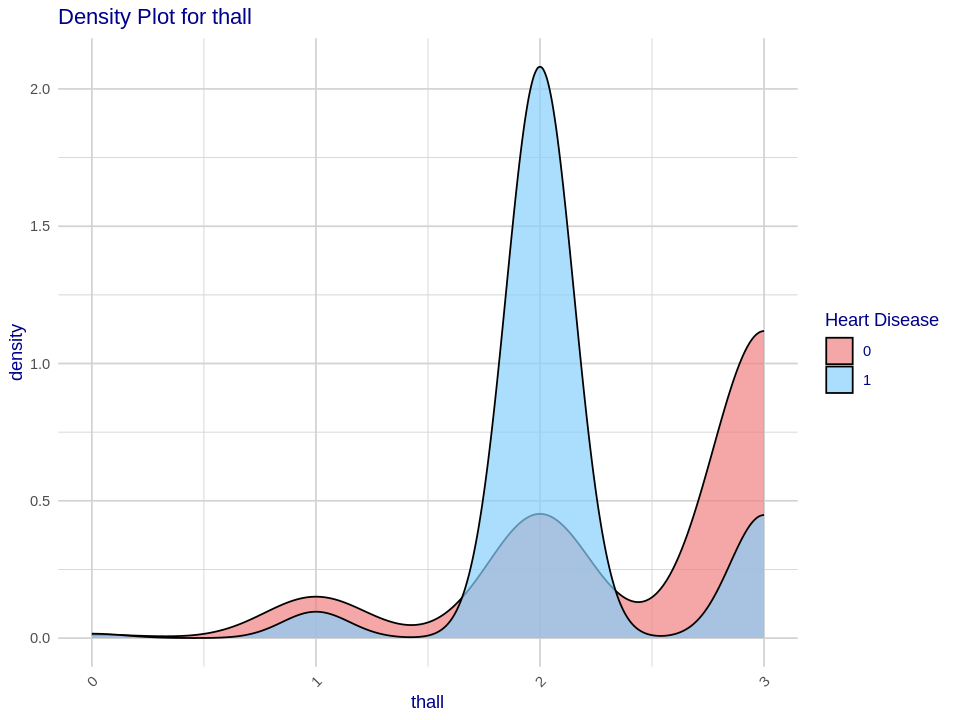

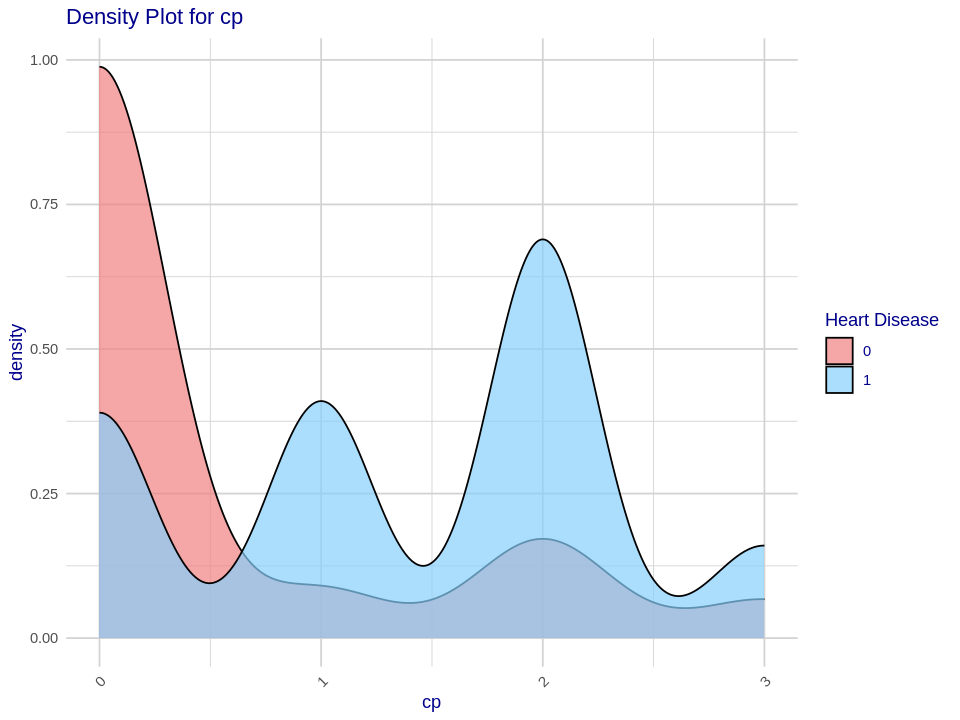

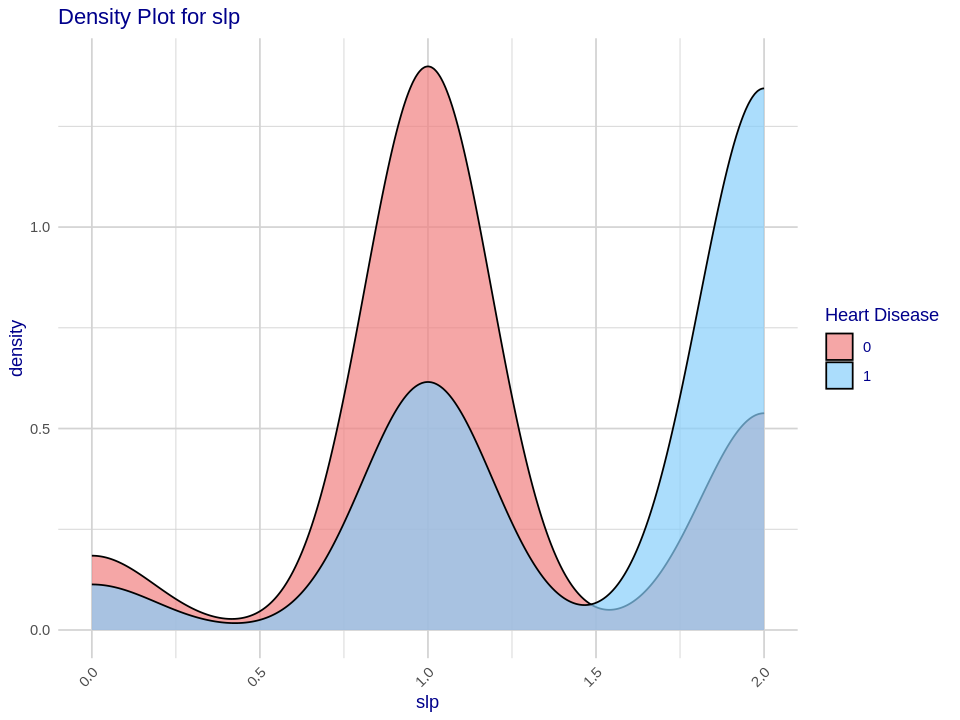

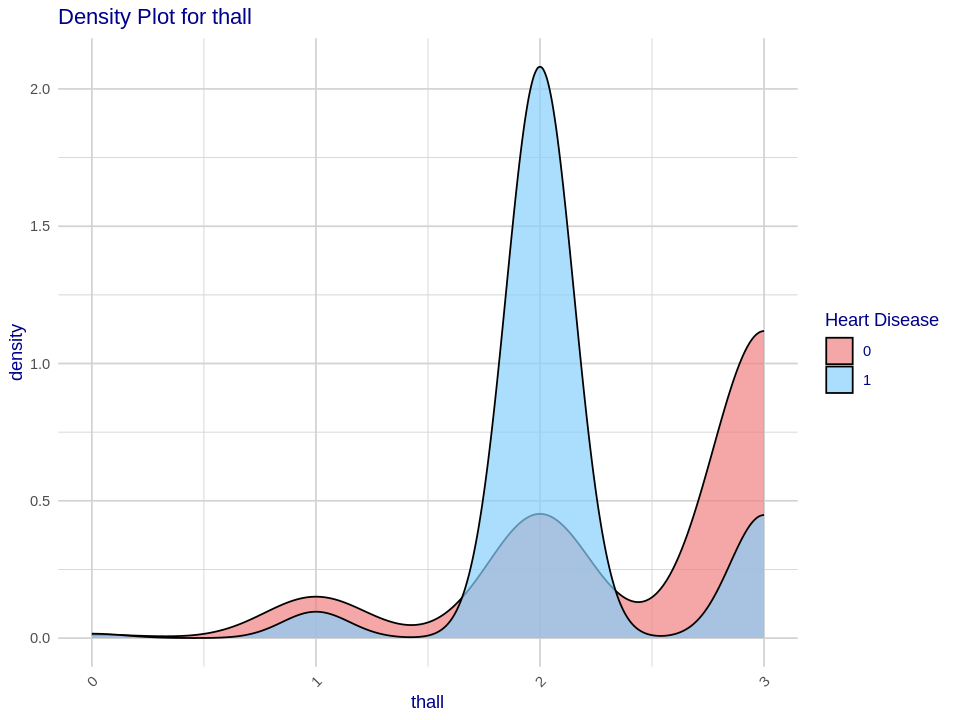

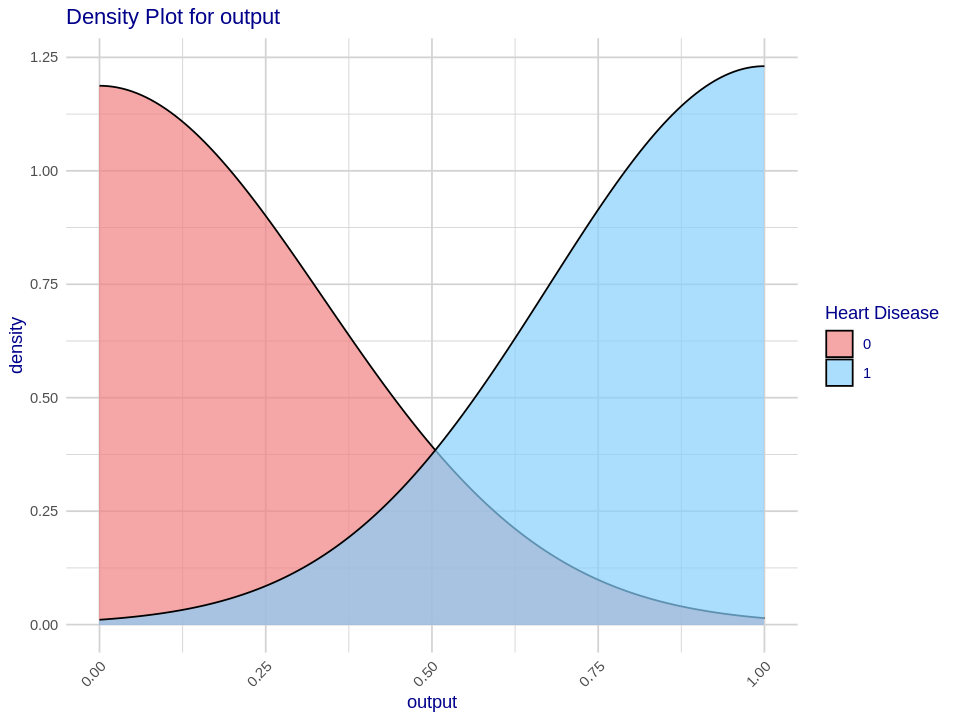

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Load the CSV file
df <- read.csv("heart.csv")

# Set a colorful theme
theme_set(theme_minimal() +
            theme(text = element_text(color = 'darkblue'),
                  axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
                  panel.grid.major = element_line(color = 'lightgray'),
                  panel.grid.minor = element_line(color = 'lightgray')))


# List of variables to create density plots for
variables <- c('age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa', 'thall', 'cp', 'slp', 'thall', 'output')

# Set up a color palette
color_palette <- c('0' = 'lightcoral', '1' = 'lightskyblue')

# Create density plots using a for loop
for (variable in variables) {
  a <- ggplot(df, aes(x = get(variable), fill = factor(output))) +
    geom_density(alpha = 0.7) +
    labs(title = paste('Density Plot for', variable), x = variable, fill = 'Heart Disease') +
    scale_fill_manual(values = color_palette)
  print(a)
}


In [ ]:
# Assuming df is your dataset
cor_matrix <- cor(df[, c("age", "trtbps", "chol", "thalachh", "oldpeak")])

# Print the correlation matrix
print(cor_matrix)


                age      trtbps         chol     thalachh     oldpeak
age       1.0000000  0.27935091  0.213677957 -0.398521938  0.21001257
trtbps    0.2793509  1.00000000  0.123174207 -0.046697728  0.19321647
chol      0.2136780  0.12317421  1.000000000 -0.009939839  0.05395192
thalachh -0.3985219 -0.04669773 -0.009939839  1.000000000 -0.34418695
oldpeak   0.2100126  0.19321647  0.053951920 -0.344186948  1.00000000


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



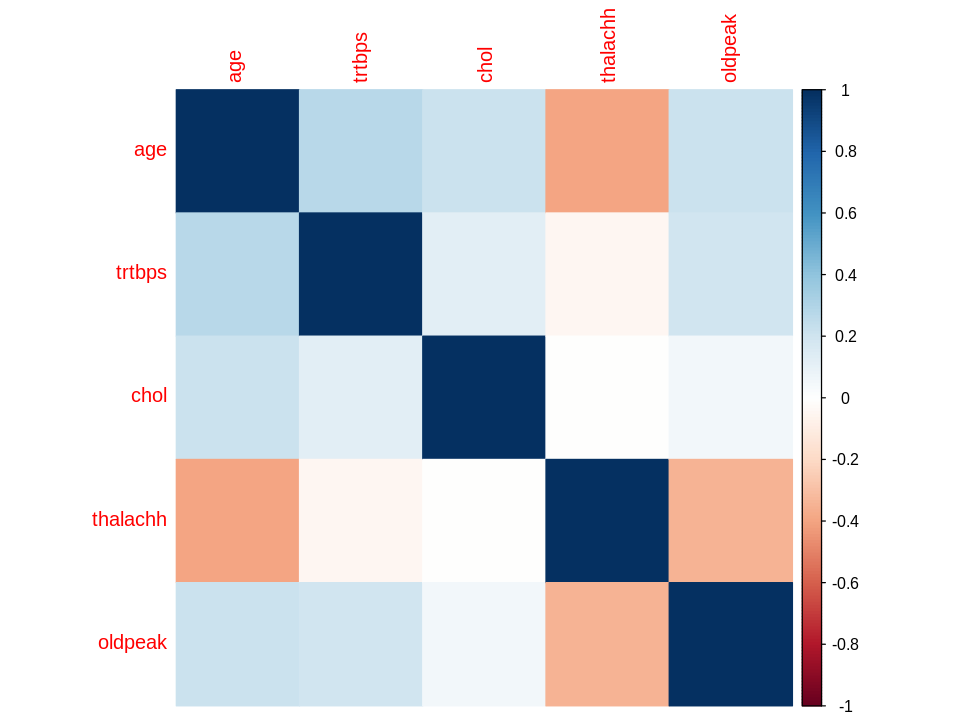

In [ ]:
install.packages("corrplot")
# Load the corrplot library
library(corrplot)

# Create a correlation matrix
cor_matrix <- cor(df[, c("age", "trtbps", "chol", "thalachh", "oldpeak")])

# Plot a correlation heatmap
corrplot(cor_matrix, method = "color")


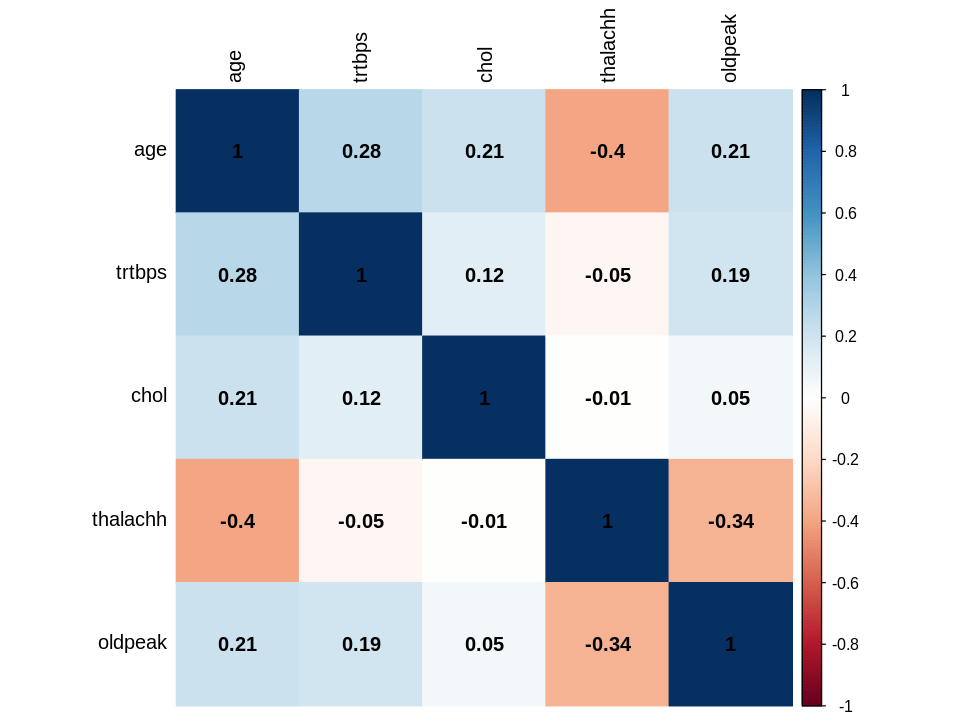

In [ ]:
# Install and load the corrplot library
if (!requireNamespace("corrplot", quietly = TRUE)) {
  install.packages("corrplot")
}
library(corrplot)

# Create a correlation matrix
cor_matrix <- cor(df[, c("age", "trtbps", "chol", "thalachh", "oldpeak")])

# Plot a correlation heatmap with numerical values inside the matrix
corrplot(cor_matrix, method = "color", addCoef.col = "black", tl.col = "black")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



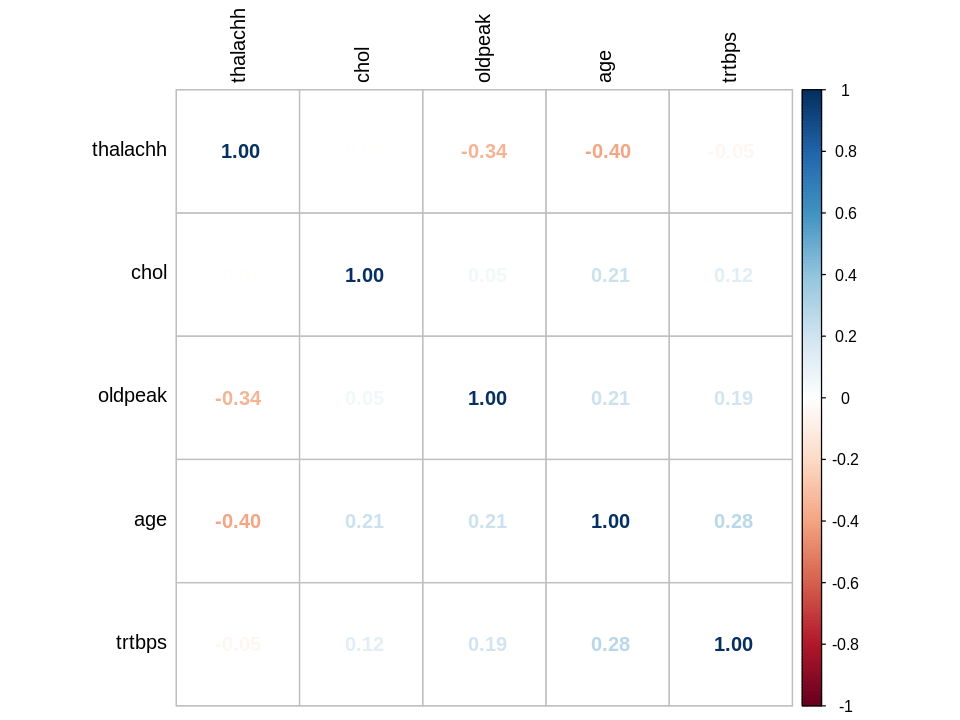

In [ ]:
# Assuming df is your dataset
# Make sure to install and load the corrplot library
install.packages("corrplot")
library(corrplot)

# Create a correlation matrix
cor_matrix <- cor(df[, c("age", "trtbps", "chol", "thalachh", "oldpeak")])

# Plot a correlation heatmap with numbers
corrplot(cor_matrix, method = "number", order = "hclust", addCoef.col = "black", tl.col = "black")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



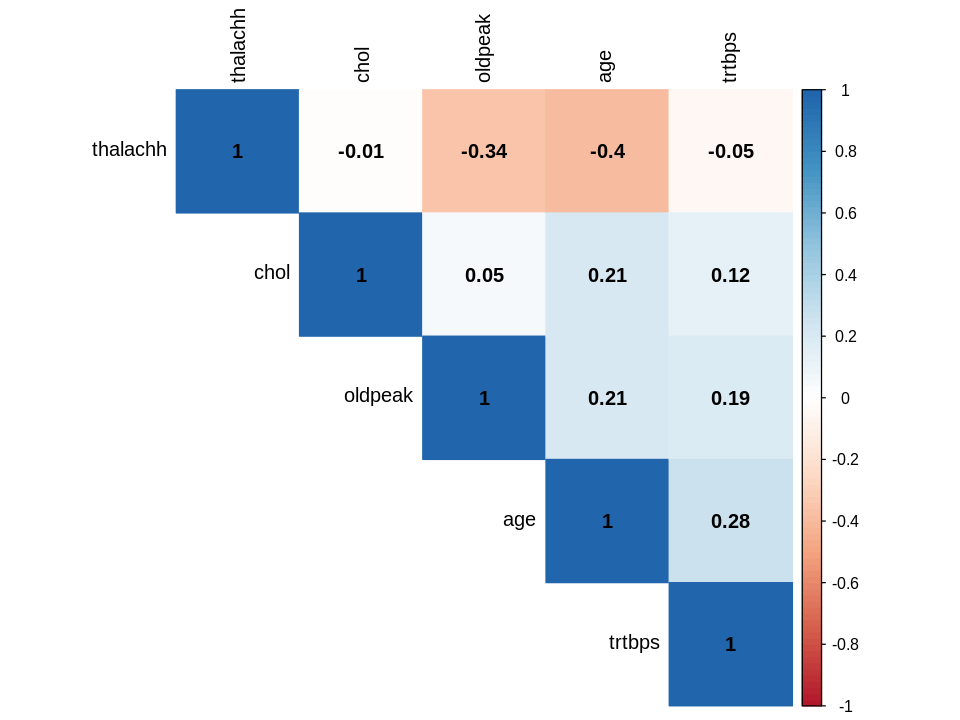

In [ ]:
# Assuming df is your dataset
# Make sure to install and load the corrplot library
install.packages("corrplot")
library(corrplot)

# Create a correlation matrix
cor_matrix <- cor(df[, c("age", "trtbps", "chol", "thalachh", "oldpeak")])

# Plot a correlation heatmap with colored cells
corrplot(cor_matrix, method = "color", type = "upper", order = "hclust", addCoef.col = "black", tl.col = "black", col = colorRampPalette(c("#B2182B", "#D6604D", "#F4A582", "#FDDBC7", "#FFFFFF", "#D1E5F0", "#92C5DE", "#4393C3", "#2166AC"))(100))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



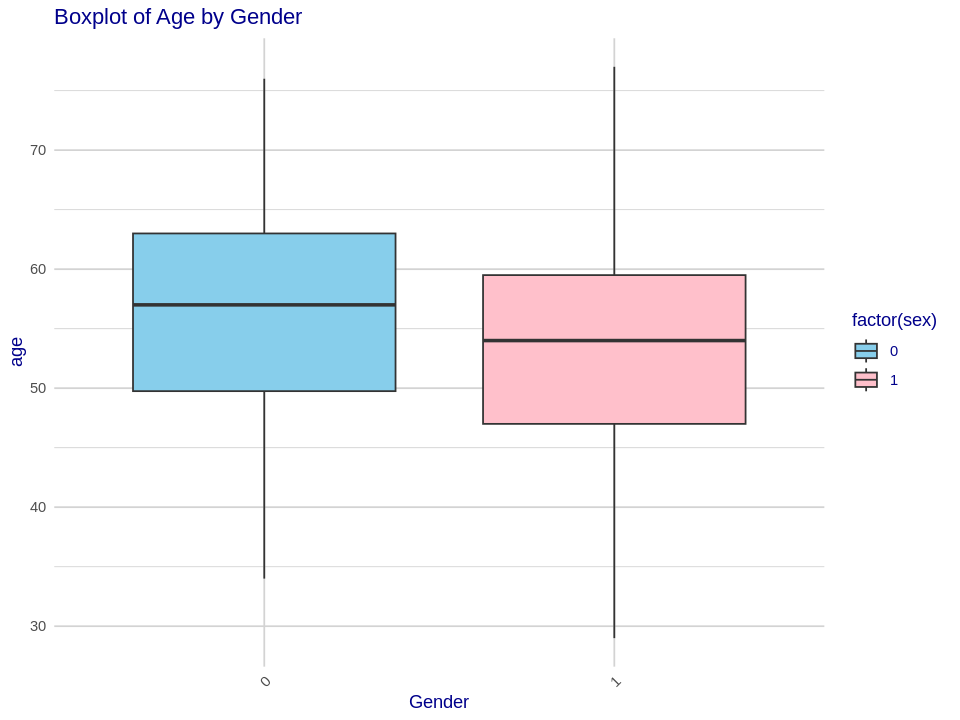

In [ ]:
install.packages("ggplot2")

library(ggplot2)


#Boxplot of Age by Gender
ggplot(df, aes(x = factor(sex), y = age, fill = factor(sex))) +
  geom_boxplot() +
  labs(x = 'Gender', y = 'age', title = 'Boxplot of Age by Gender') +
  scale_fill_manual(values = c('skyblue', 'pink'))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Loading required package: viridisLite



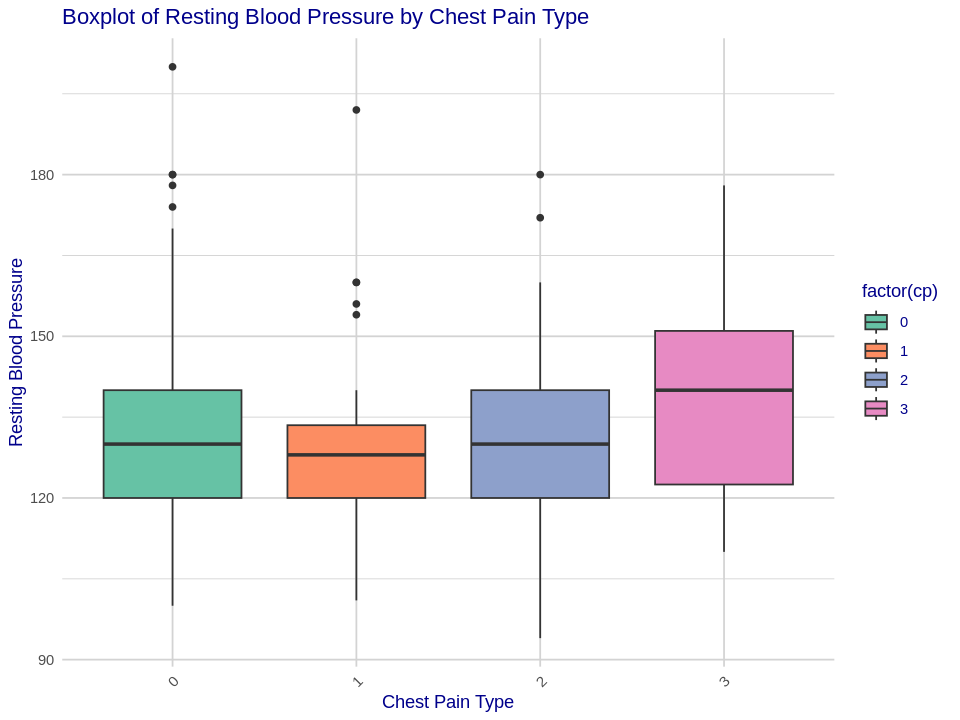

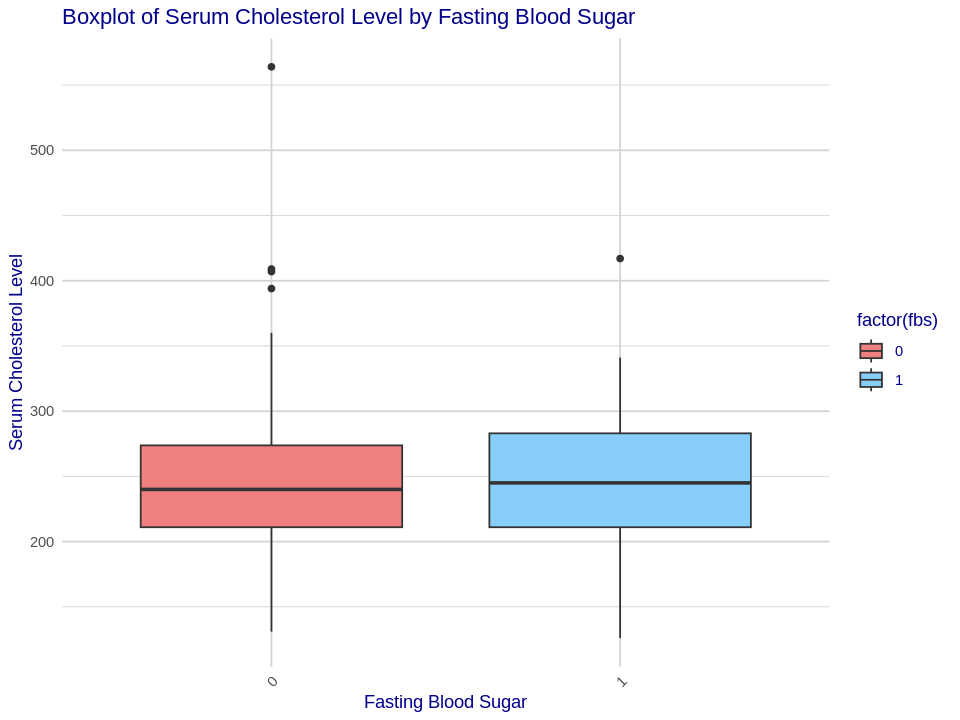

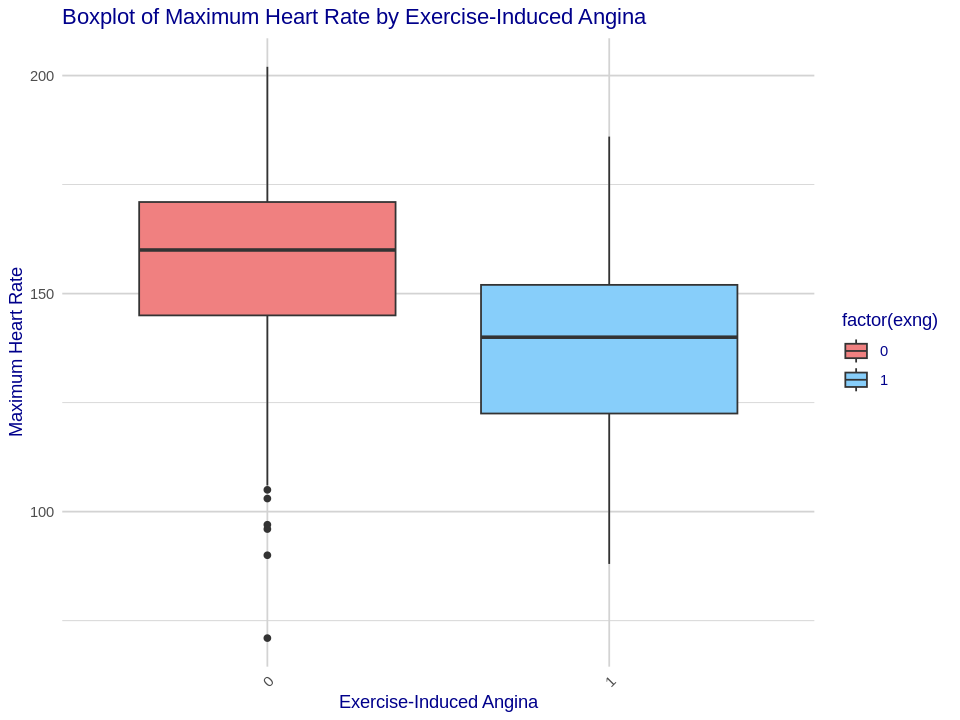

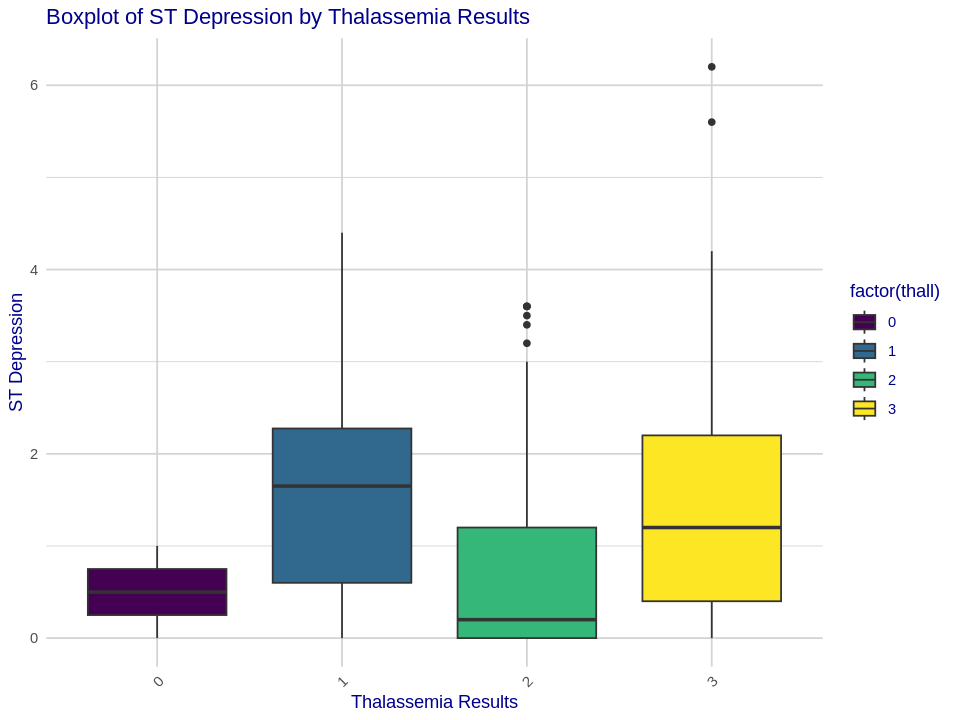

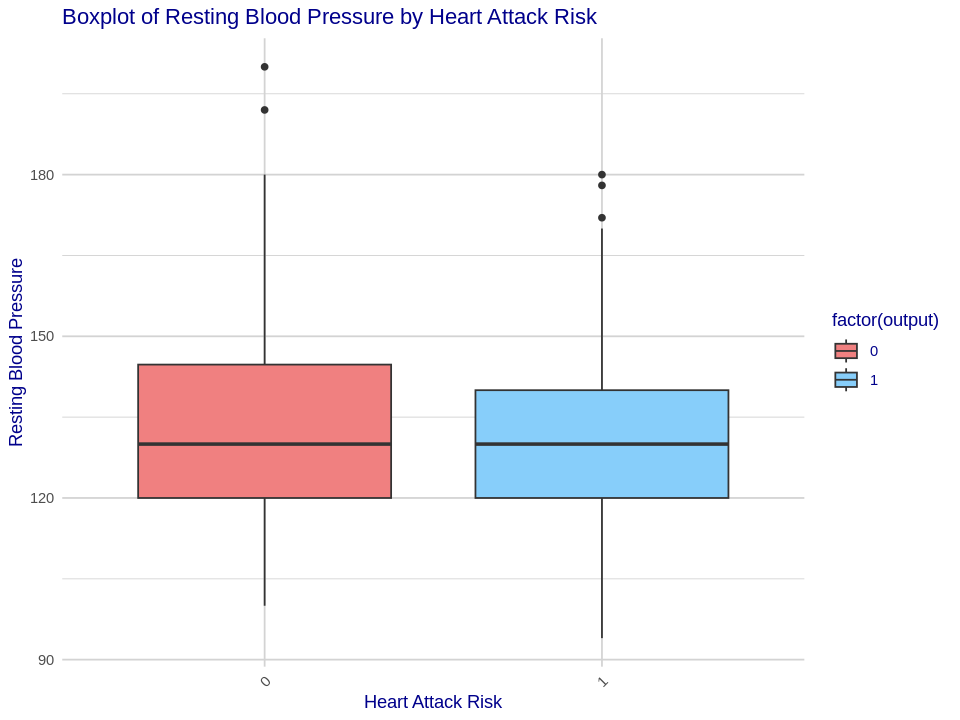

In [ ]:
install.packages("viridis")

library(viridis)


#Boxplot of Resting Blood Pressure by Chest Pain Type
ggplot(df, aes(x = factor(cp), y = trtbps, fill = factor(cp))) +
  geom_boxplot() +
  labs(x = 'Chest Pain Type', y = 'Resting Blood Pressure', title = 'Boxplot of Resting Blood Pressure by Chest Pain Type') +
  scale_fill_brewer(palette = 'Set2')

#Boxplot of Serum Cholesterol Level by Fasting Blood Sugar
ggplot(df, aes(x = factor(fbs), y = chol, fill = factor(fbs))) +
  geom_boxplot() +
  labs(x = 'Fasting Blood Sugar', y = 'Serum Cholesterol Level', title = 'Boxplot of Serum Cholesterol Level by Fasting Blood Sugar') +
  scale_fill_manual(values = c('lightcoral', 'lightskyblue'))

#Boxplot of Maximum Heart Rate by Exercise-Induced Angina
ggplot(df, aes(x = factor(exng), y = thalachh, fill = factor(exng))) +
  geom_boxplot() +
  labs(x = 'Exercise-Induced Angina', y = 'Maximum Heart Rate', title = 'Boxplot of Maximum Heart Rate by Exercise-Induced Angina') +
  scale_fill_manual(values = c('lightcoral', 'lightskyblue'))

#Boxplot of ST Depression by Thalassemia Results
ggplot(df, aes(x = factor(thall), y = oldpeak, fill = factor(thall))) +
  geom_boxplot() +
  labs(x = 'Thalassemia Results', y = 'ST Depression', title = 'Boxplot of ST Depression by Thalassemia Results') +
  scale_fill_viridis(discrete = TRUE)

#Boxplot of Resting Blood Pressure by Heart Attack Risk
ggplot(df, aes(x = factor(output), y = trtbps, fill = factor(output))) +
  geom_boxplot() +
  labs(x = 'Heart Attack Risk', y = 'Resting Blood Pressure', title = 'Boxplot of Resting Blood Pressure by Heart Attack Risk') +
  scale_fill_manual(values = c('lightcoral', 'lightskyblue'))


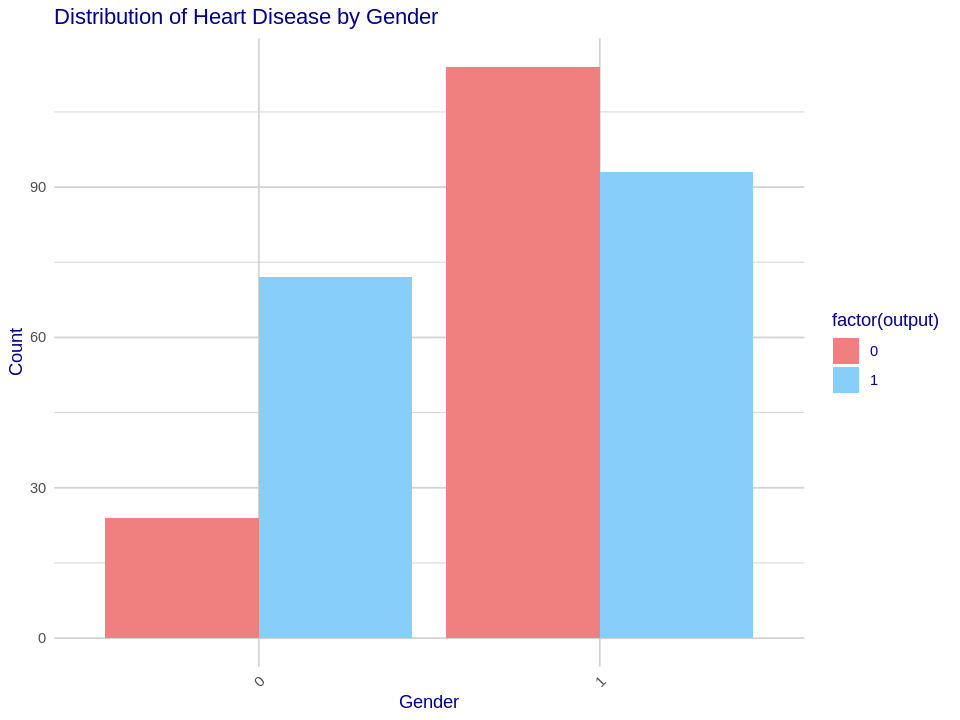

In [ ]:
#Bar Plot: Gender Distribution by Heart Disease
ggplot(df, aes(x = factor(sex), fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(x = 'Gender', y = 'Count', title = 'Distribution of Heart Disease by Gender') +
  scale_fill_manual(values = c('0' = 'lightcoral', '1' = 'lightskyblue'))


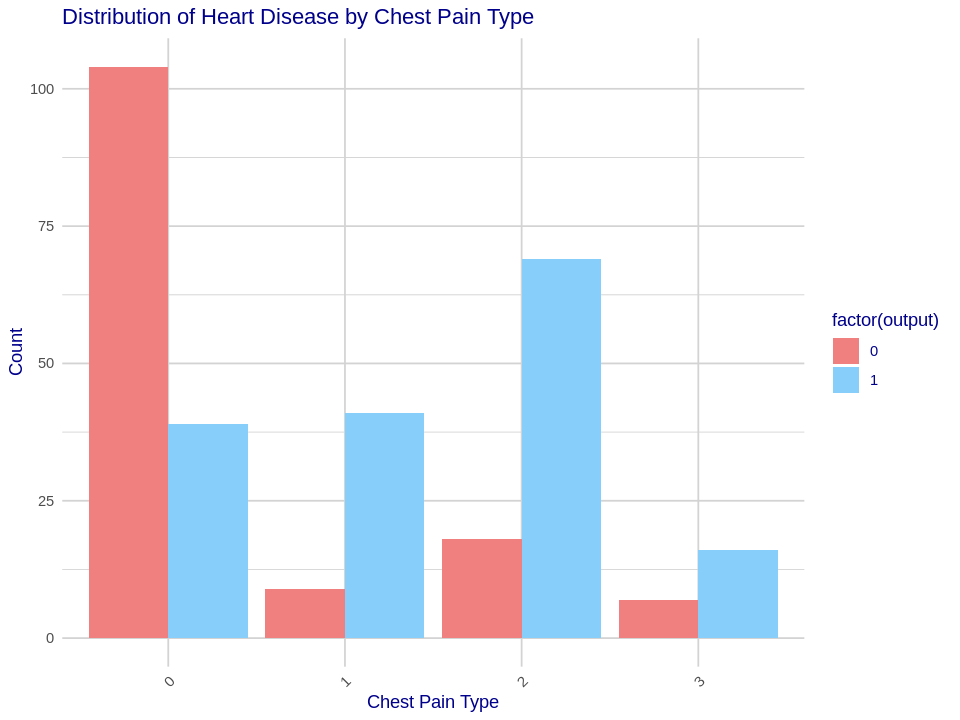

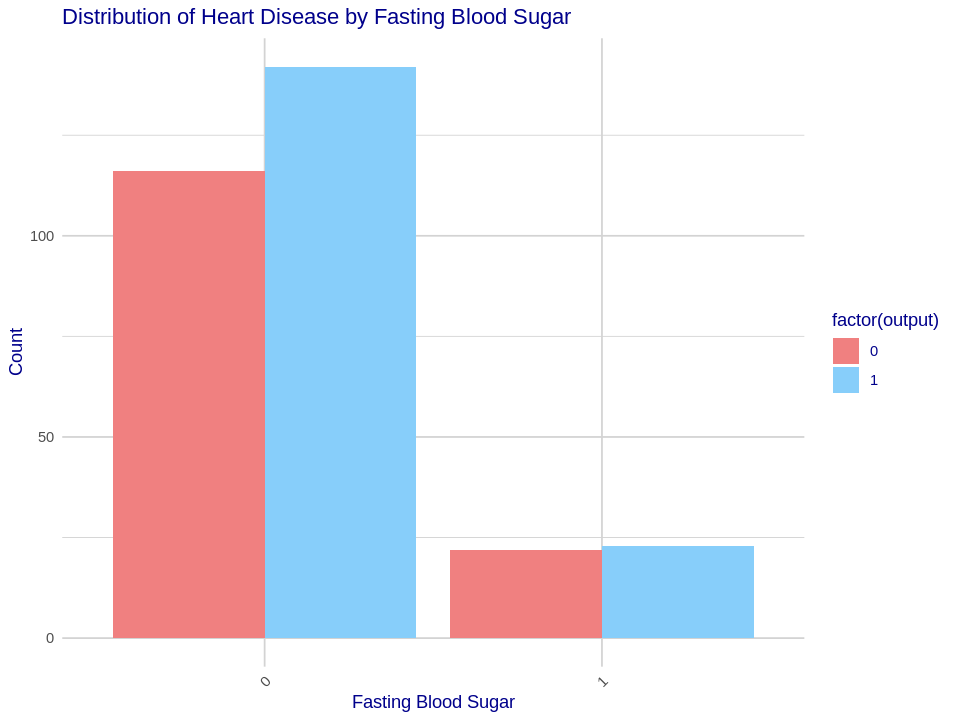

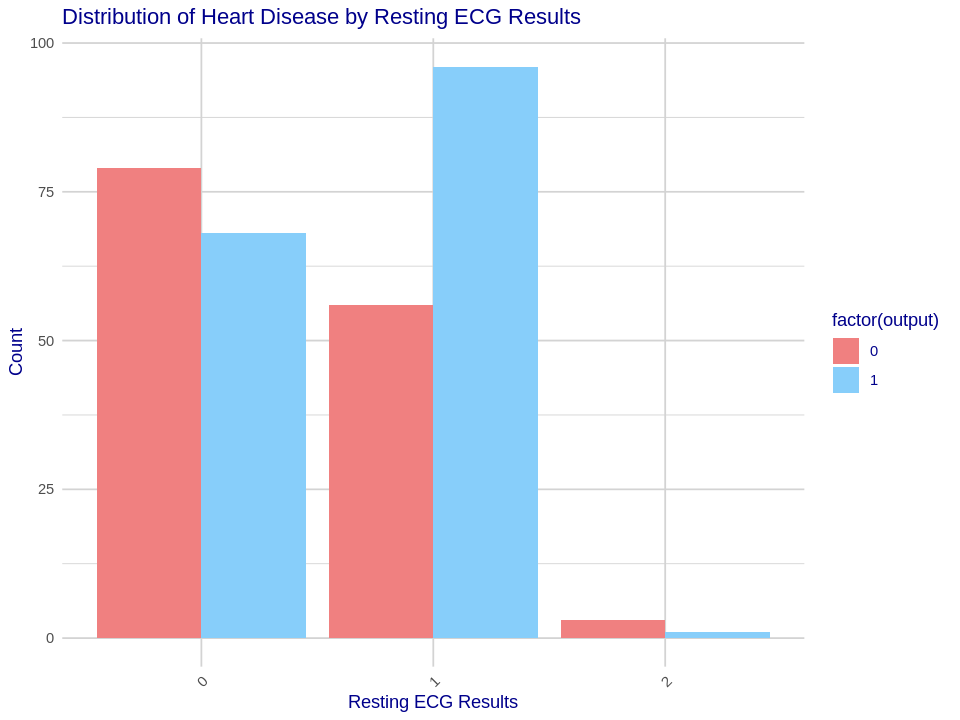

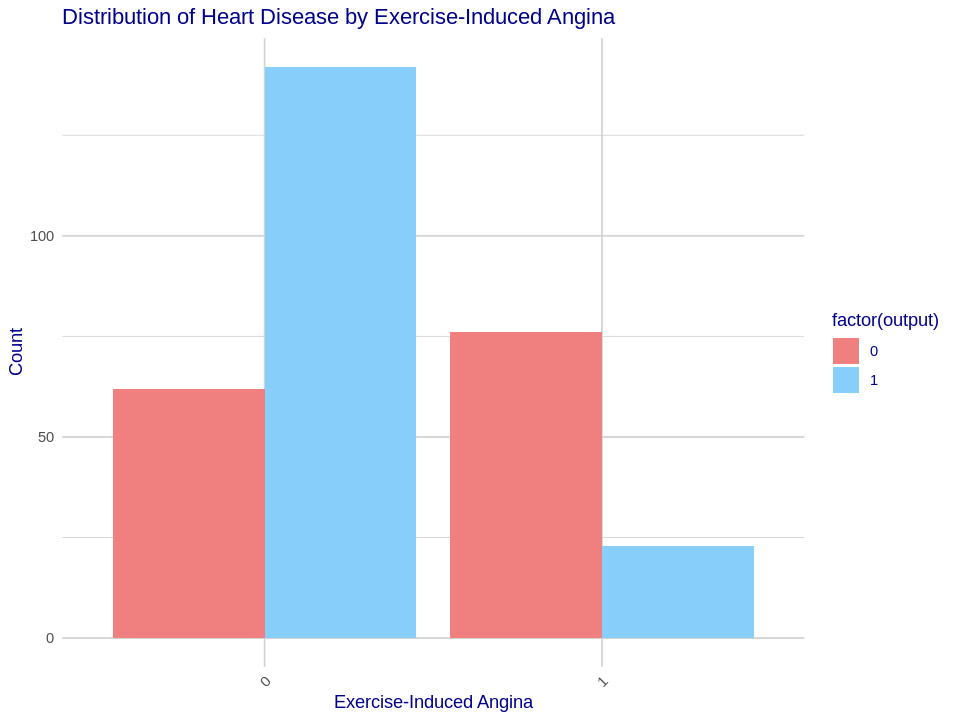

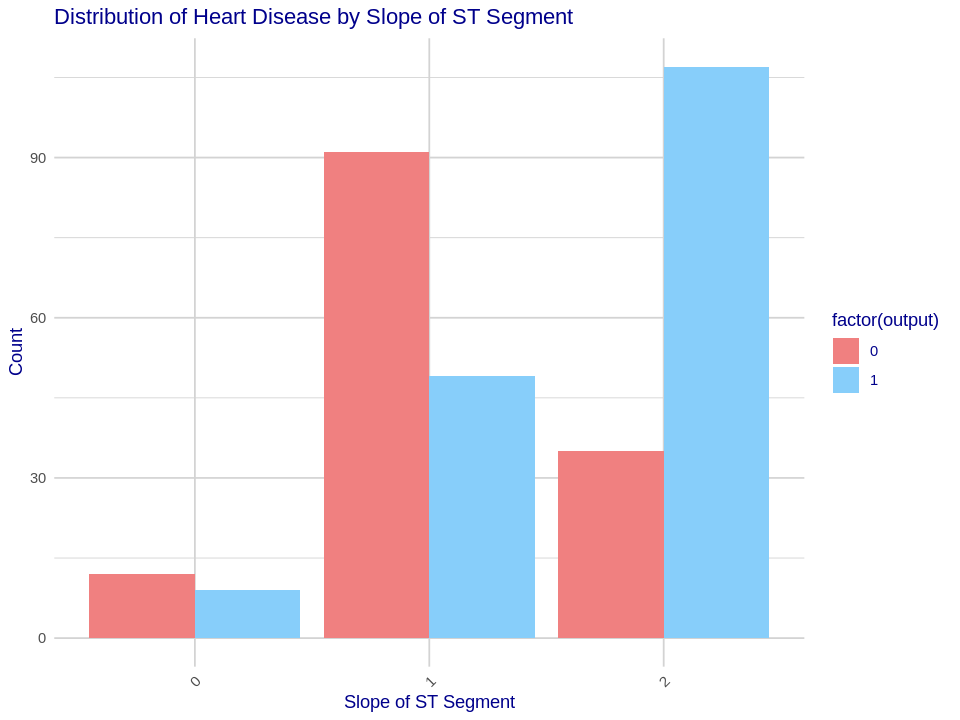

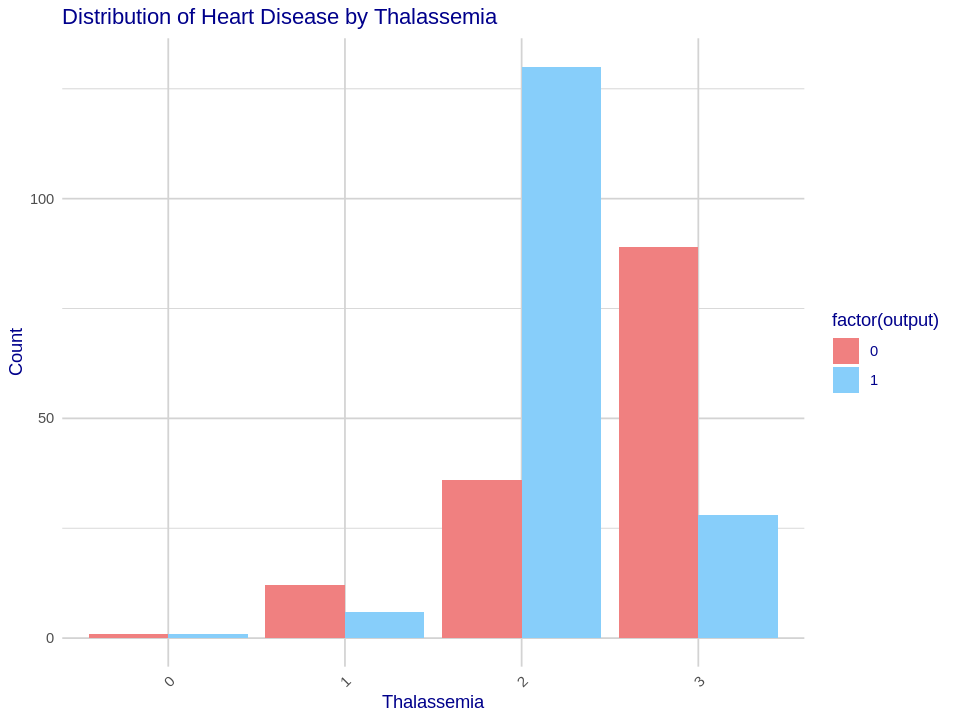

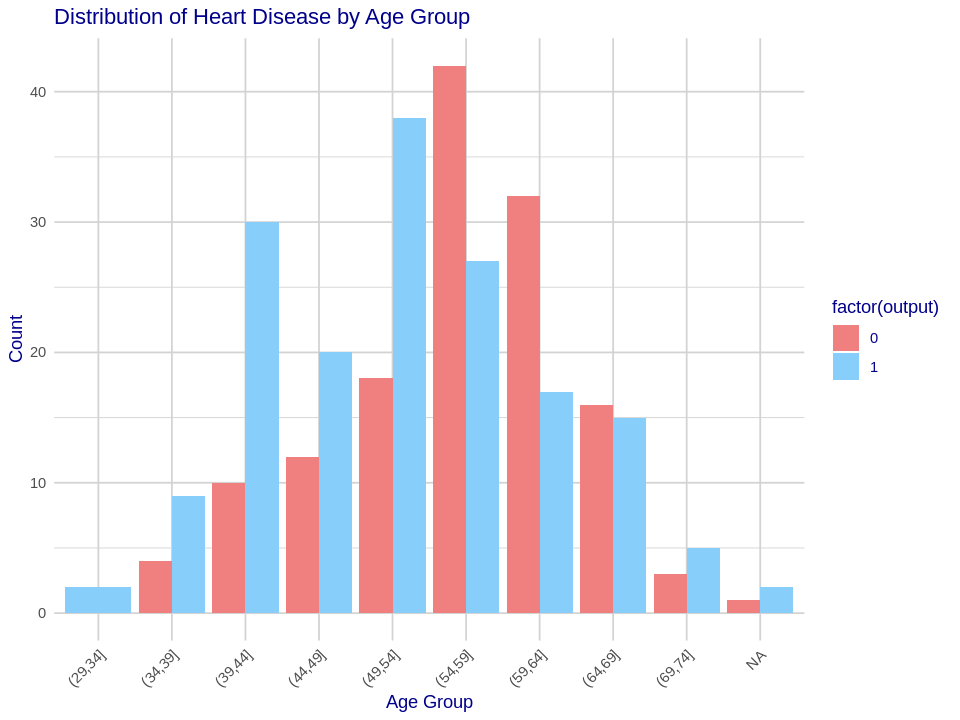

In [ ]:
#Bar Plot: Chest Pain Type Distribution by Heart Disease
ggplot(df, aes(x = factor(cp), fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(x = 'Chest Pain Type', y = 'Count', title = 'Distribution of Heart Disease by Chest Pain Type') +
  scale_fill_manual(values = c('0' = 'lightcoral', '1' = 'lightskyblue'))

#Bar Plot: Fasting Blood Sugar Distribution by Heart Disease
ggplot(df, aes(x = factor(fbs), fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(x = 'Fasting Blood Sugar', y = 'Count', title = 'Distribution of Heart Disease by Fasting Blood Sugar') +
  scale_fill_manual(values = c('0' = 'lightcoral', '1' = 'lightskyblue'))

#Bar Plot: Resting Electrocardiographic Results Distribution by Heart Disease
ggplot(df, aes(x = factor(restecg), fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(x = 'Resting ECG Results', y = 'Count', title = 'Distribution of Heart Disease by Resting ECG Results') +
  scale_fill_manual(values = c('0' = 'lightcoral', '1' = 'lightskyblue'))

#Bar Plot: Exercise-Induced Angina Distribution by Heart Disease
ggplot(df, aes(x = factor(exng), fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(x = 'Exercise-Induced Angina', y = 'Count', title = 'Distribution of Heart Disease by Exercise-Induced Angina') +
  scale_fill_manual(values = c('0' = 'lightcoral', '1' = 'lightskyblue'))

#Bar Plot: Slope of the Peak Exercise ST Segment Distribution by Heart Disease
ggplot(df, aes(x = factor(slp), fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(x = 'Slope of ST Segment', y = 'Count', title = 'Distribution of Heart Disease by Slope of ST Segment') +
  scale_fill_manual(values = c('0' = 'lightcoral', '1' = 'lightskyblue'))

#Bar Plot: Thalassemia Distribution by Heart Disease
ggplot(df, aes(x = factor(thall), fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(x = 'Thalassemia', y = 'Count', title = 'Distribution of Heart Disease by Thalassemia') +
  scale_fill_manual(values = c('0' = 'lightcoral', '1' = 'lightskyblue'))

#Bar Plot: Age Group Distribution by Heart Disease
df$age_group <- cut(df$age, breaks = seq(29, 77, by = 5))
ggplot(df, aes(x = age_group, fill = factor(output))) +
  geom_bar(position = "dodge") +
  labs(x = 'Age Group', y = 'Count', title = 'Distribution of Heart Disease by Age Group') +
  scale_fill_manual(values = c('0' = 'lightcoral', '1' = 'lightskyblue'))



In [ ]:
# Assuming df is your data frame
library(ggplot2)

# Contingency table for Sex and Output
sex_output_table <- table(df$sex, df$output)

# Print the contingency table
print(sex_output_table)

# Heatmap for Sex and Output
ggplot(df, aes(x = sex, y = output, fill = ..count..)) +
  geom_tile() +
  labs(title = "Contingency Table Heatmap: Sex vs. Output", x = "Sex", y = "Output") +
  theme_minimal()

# Contingency table for CP (Chest Pain Type) and Output
cp_output_table <- table(df$cp, df$output)

# Print the contingency table
print(cp_output_table)

# Heatmap for CP (Chest Pain Type) and Output
ggplot(df, aes(x = factor(cp), y = output, fill = ..count..)) +
  geom_tile() +
  labs(title = "Contingency Table Heatmap: Chest Pain Type vs. Output", x = "Chest Pain Type", y = "Output") +
  theme_minimal()


In [ ]:
# Selecting only the categorical variables for the heatmap
categorical_data <- df[, c("sex", "cp", "fbs", "restecg", "slp", "caa", "thall", "output")]

# Convert categorical variables to factors for better labeling
categorical_data[] <- lapply(categorical_data, as.factor)

# Create a heatmap
ggplot(categorical_data, aes(x = 1, y = seq_along(categorical_data), fill = sex)) +
  geom_tile() +
  theme_minimal() +
  theme(axis.text.x = element_blank(), axis.text.y = element_text(size = 8, face = "bold")) +
  labs(title = "Heatmap of Categorical Variables", fill = "sex") +
  scale_fill_manual(values = c("#66c2a5", "#fc8d62"))  # Custom colors for sex


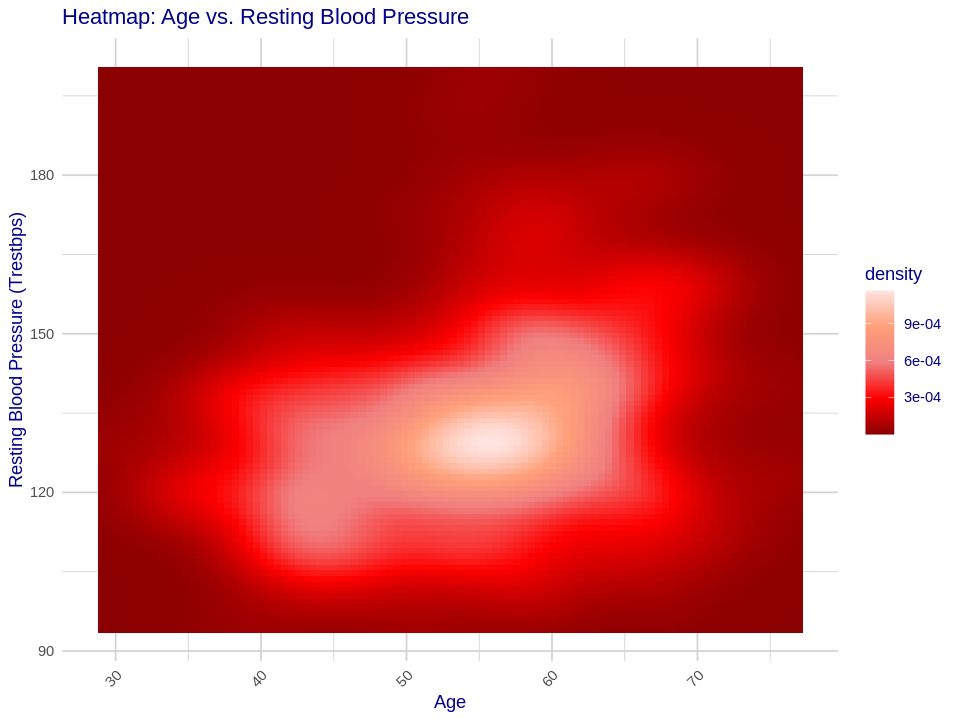

In [ ]:
color_theme <- colorRampPalette(c('darkred', 'red', 'lightcoral', 'lightsalmon', 'mistyrose'))(50)

# Heatmap for Age and Resting Blood Pressure (Trestbps)
ggplot(df, aes(x = age, y = trtbps)) +
  geom_tile(aes(fill = ..density..),stat="density2d",alpha=1) +
  scale_fill_gradientn(colors = color_theme) +
  labs(title = 'Heatmap: Age vs. Resting Blood Pressure', x = 'Age', y = 'Resting Blood Pressure (Trestbps)')


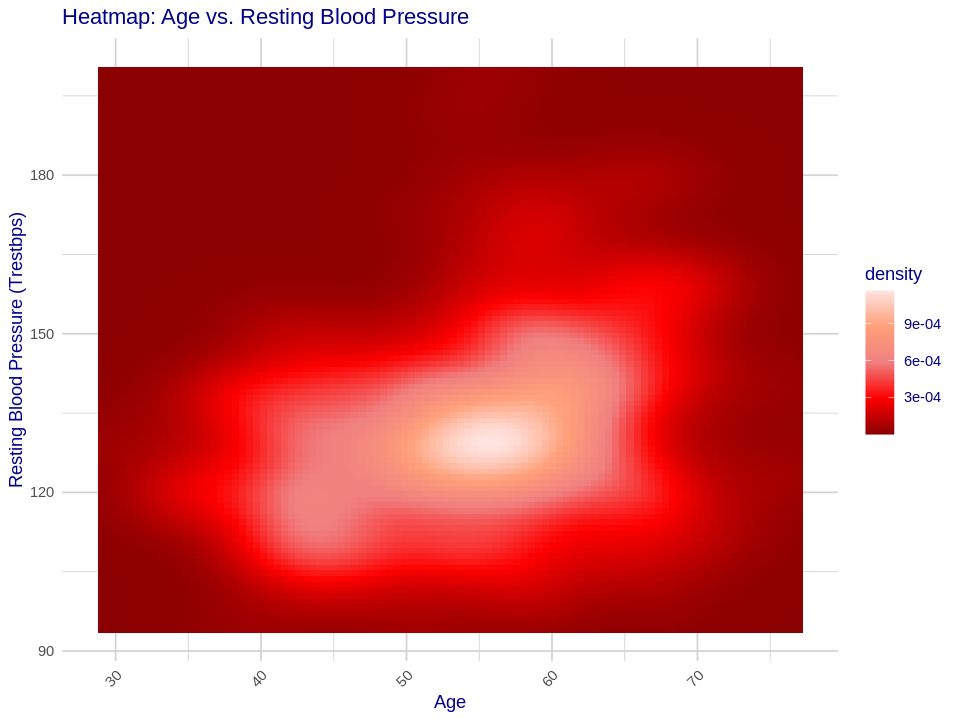

In [ ]:
color_theme <- colorRampPalette(c('darkred', 'red', 'lightcoral', 'lightsalmon', 'mistyrose'))(50)

# Heatmap for Age and Resting Blood Pressure (Trestbps)
ggplot(df, aes(x = age, y = trtbps)) +
  geom_tile(aes(fill = ..density..),stat="density2d",alpha=1) +
  scale_fill_gradientn(colors = color_theme) +
  labs(title = 'Heatmap: Age vs. Resting Blood Pressure', x = 'Age', y = 'Resting Blood Pressure (Trestbps)')


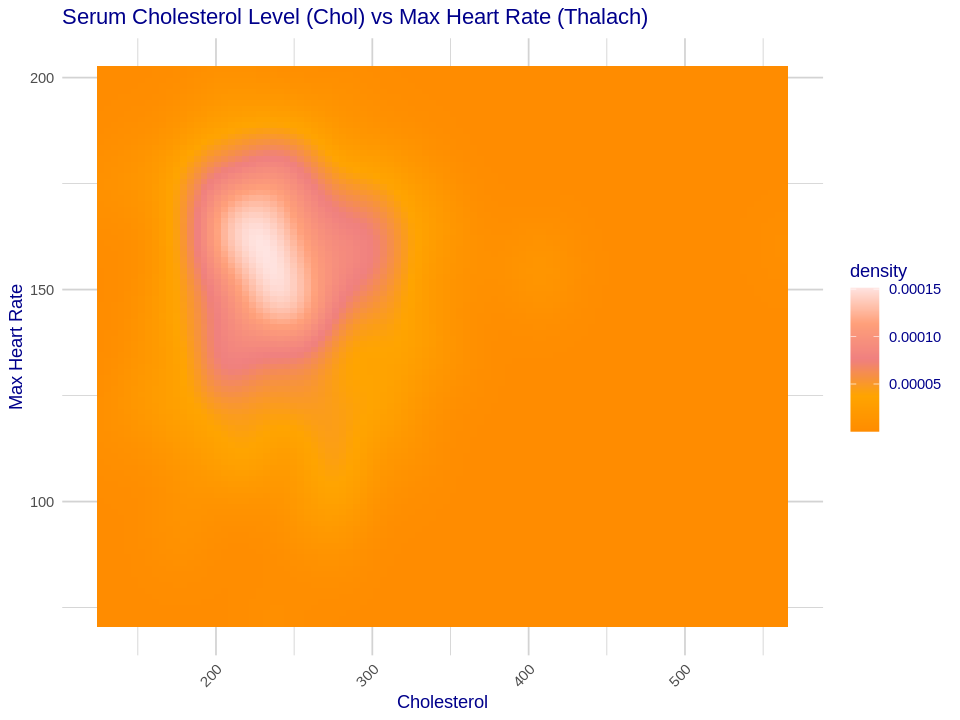

In [ ]:
color_theme <- colorRampPalette(c('darkorange', 'orange', 'lightcoral', 'lightsalmon', 'mistyrose'))(50)

#Heatmap for Serum Cholesterol Level (Chol) and Max Heart Rate (Thalach)

ggplot(df, aes(x = chol, y = thalachh)) +
  geom_tile(aes(fill = ..density..),stat="density2d",alpha=1) +
  scale_fill_gradientn(colors = color_theme) +
  labs(title = 'Serum Cholesterol Level (Chol) vs Max Heart Rate (Thalach)', x = 'Cholesterol', y = 'Max Heart Rate')

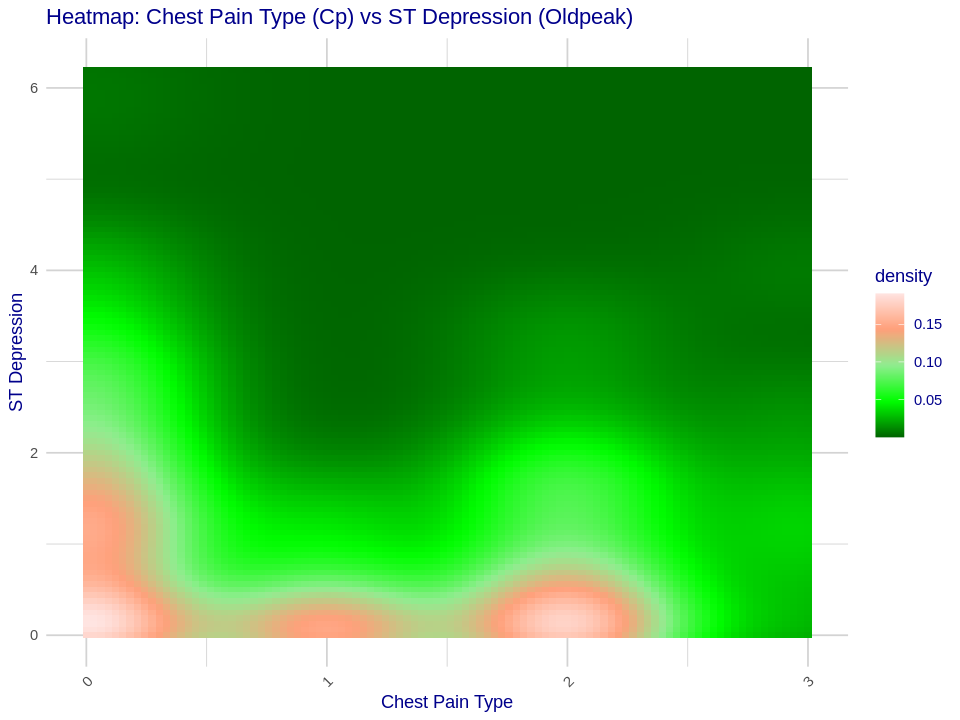

In [ ]:
color_theme <- colorRampPalette(c('darkgreen', 'green', 'lightgreen', 'lightsalmon', 'mistyrose'))(50)

# Heatmap for Chest Pain Type (Cp) and ST Depression (Oldpeak)

ggplot(df, aes(x = cp, y = oldpeak)) +
  geom_tile(aes(fill = ..density..),stat="density2d",alpha=1) +
  scale_fill_gradientn(colors = color_theme) +
  labs(title = 'Heatmap: Chest Pain Type (Cp) vs ST Depression (Oldpeak)', x = 'Chest Pain Type', y = 'ST Depression')

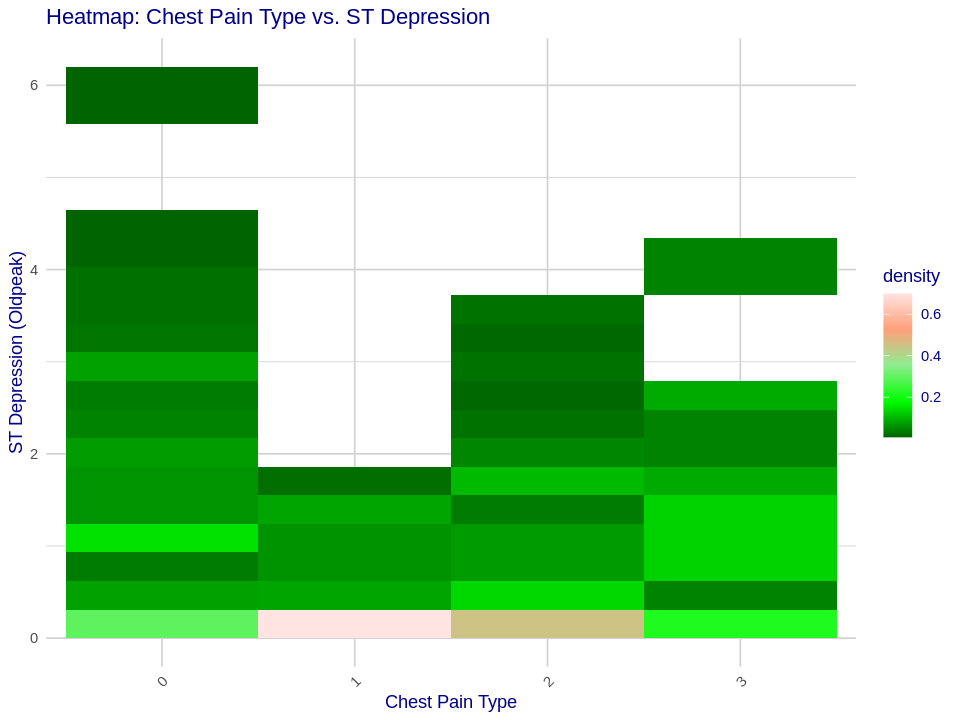

In [ ]:
# Heatmap for Chest Pain Type (Cp) and ST Depression (Oldpeak)
ggplot(df, aes(x = as.factor(cp), y = oldpeak, fill = ..density..)) +
  geom_bin2d(bins = 20) +
  scale_fill_gradientn(colors = color_theme) +
  labs(title = 'Heatmap: Chest Pain Type vs. ST Depression', x = 'Chest Pain Type', y = 'ST Depression (Oldpeak)')



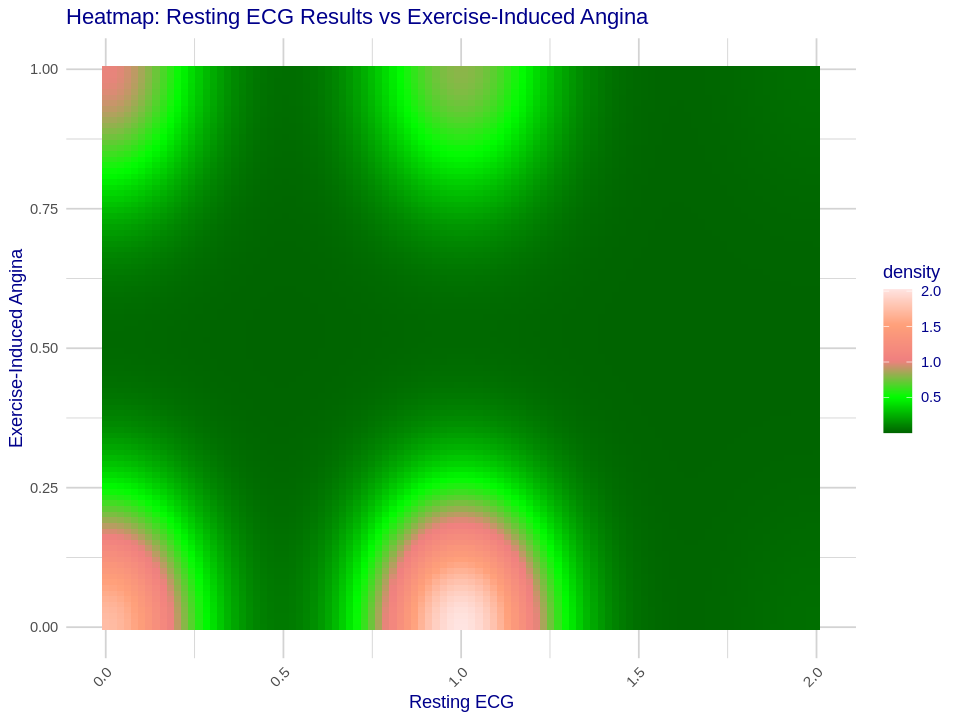

In [ ]:
color_theme <- colorRampPalette(c('darkgreen', 'green', 'lightcoral', 'lightsalmon', 'mistyrose'))(50)

# Heatmap for Resting ECG Results (Restecg) and Exercise-Induced Angina (Exang)

ggplot(df, aes(x = restecg, y = exng)) +
  geom_tile(aes(fill = ..density..),stat="density2d",alpha=1) +
  scale_fill_gradientn(colors = color_theme) +
  labs(title = 'Heatmap: Resting ECG Results vs Exercise-Induced Angina', x = 'Resting ECG', y = 'Exercise-Induced Angina')

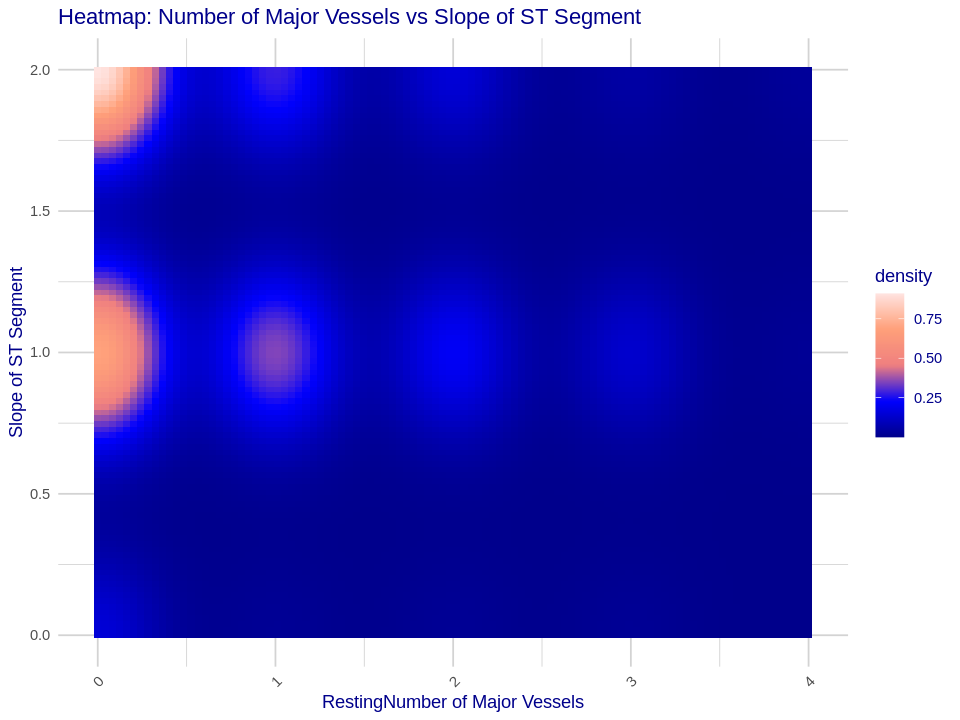

In [ ]:
color_theme <- colorRampPalette(c('darkblue', 'blue', 'lightcoral', 'lightsalmon', 'mistyrose'))(50)

# Heatmap for Number of Major Vessels (Ca) and Slope of ST Segment (Slope)


ggplot(df, aes(x = caa, y = slp)) +
  geom_tile(aes(fill = ..density..),stat="density2d",alpha=1) +
  scale_fill_gradientn(colors = color_theme) +
  labs(title = 'Heatmap: Number of Major Vessels vs Slope of ST Segment', x = 'RestingNumber of Major Vessels', y = 'Slope of ST Segment')

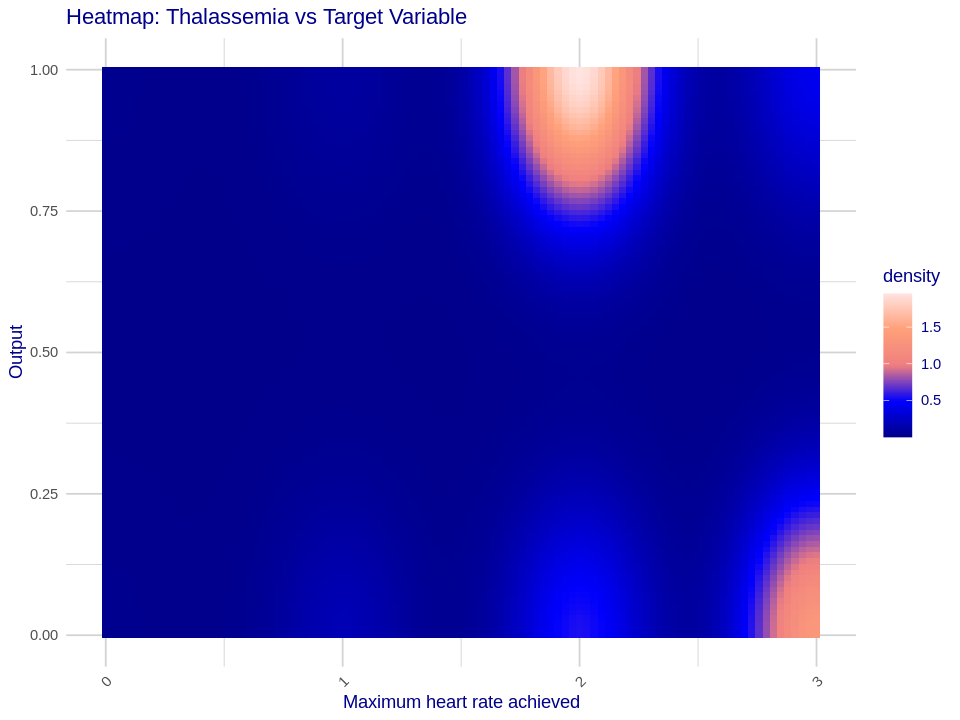

In [ ]:
color_theme <- colorRampPalette(c('darkblue', 'blue', 'lightcoral', 'lightsalmon', 'mistyrose'))(50)

# Heatmap for Thalassemia (Thal) and Target Variable

ggplot(df, aes(x = thall, y = output)) +
  geom_tile(aes(fill = ..density..),stat="density2d",alpha=1) +
  scale_fill_gradientn(colors = color_theme) +
  labs(title = 'Heatmap: Thalassemia vs Target Variable', x = 'Maximum heart rate achieved', y = 'Output')

In [ ]:
# Assuming df is your dataset
# You may need to adjust the column names based on your actual dataset

# Convert categorical variables to factors
df$sex <- factor(df$sex)
df$cp <- factor(df$cp)
df$thall <- factor(df$thall)
df$output <- factor(df$output)

# # Perform logistic regression
logistic_model <- glm(output ~ ., data = df, family = "binomial")

# # Display summary of the logistic regression model
summary(logistic_model)



Call:
glm(formula = output ~ ., family = "binomial", data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.158312   3.088394  -0.051  0.95912    
age         -0.001872   0.023603  -0.079  0.93679    
sex1        -1.430269   0.508087  -2.815  0.00488 ** 
cp1          1.067739   0.558741   1.911  0.05601 .  
cp2          1.924871   0.470980   4.087 4.37e-05 ***
cp3          1.982262   0.640622   3.094  0.00197 ** 
trtbps      -0.017606   0.010502  -1.676  0.09365 .  
chol        -0.004906   0.003834  -1.280  0.20071    
fbs          0.200642   0.558300   0.359  0.71931    
restecg      0.524482   0.357927   1.465  0.14283    
thalachh     0.020866   0.010466   1.994  0.04618 *  
exng        -0.811592   0.421854  -1.924  0.05437 .  
oldpeak     -0.494525   0.224334  -2.204  0.02750 *  
slp          0.504149   0.365576   1.379  0.16788    
caa         -0.819123   0.201129  -4.073 4.65e-05 ***
thall1       1.834517   2.156339   0.851  0.39491    
th

In [ ]:
head(df)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [ ]:
head(df)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [ ]:
inputvar <- df[,c("age","sex","trtbps","chol","fbs","restecg","thalachh","exng","oldpeak","slp","caa","thall")]
outputvar <- df[,c("output")]
head(inputvar)
head(outputvar)
# a <- lm(output~age+sex+cp+trtbps+chol+fbs+restecg+thalachh+exng+oldpeak+slp+caa+thall+age_group,data=df)

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,63,1,145,233,1,0,150,0,2.3,0,0,1
2,37,1,130,250,0,1,187,0,3.5,0,0,2
3,41,0,130,204,0,0,172,0,1.4,2,0,2
4,56,1,120,236,0,1,178,0,0.8,2,0,2
5,57,0,120,354,0,1,163,1,0.6,2,0,2
6,57,1,140,192,0,1,148,0,0.4,1,0,1


[1] 1 1 1 1 1 1

In [ ]:
model <- glm(output~age+sex+cp+trtbps+chol+fbs+restecg+thalachh+exng+oldpeak+slp+caa+thall,data=df,family = "binomial")
attributes(model)

$names
 [1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          

$class
[1] "glm" "lm"

In [ ]:
pre <- data.frame(age=57,sex=0,cp=1,trtbps=120,chol=354,fbs=0,restecg=1,thalachh=163,exng=1,oldpeak=0.6,slp=2,caa=0,thall=2)
pre$thall = factor(pre$thall)
pre$sex = factor(pre$sex)
pre$cp = factor(pre$cp)

In [ ]:
pre2 <- data.frame(age=57,sex=0,cp=1,trtbps=130,chol=236,fbs=0,restecg=0,thalachh=174,exng=0,oldpeak=0.0,slp=1,caa=1,thall=2)
pre2$thall = factor(pre2$thall)
pre2$sex = factor(pre2$sex)
pre2$cp = factor(pre2$cp)

In [ ]:
predict(model,pre)

ERROR: ignored

In [ ]:
predict(model,pre2)

ERROR: ignored

In [ ]:
summary(logistic_model)

ERROR: ignored

In [ ]:
# # Install and load the necessary libraries
# install.packages("caTools")
# library(caTools)

# Assuming 'output' is your binary outcome variable (0 or 1)
# Make sure to replace 'output' with your actual outcome variable name

# Split the data into training and testing sets
set.seed(123)  # for reproducibility
split <- sample.split(df$output, SplitRatio = 0.7)
train_data <- subset(df, split == TRUE)
test_data <- subset(df, split == FALSE)

x_train <- train_data[, !(names(train_data) %in% c("output"))]  # Exclude the output variable
y_train <- train_data$output
x_test <- train_data[, !(names(train_data) %in% c("output"))]  # Exclude the output variable
y_test <- train_data$output

In [ ]:
# Install and load the necessary library
install.packages("class")
library(class)

# Create a KNN classifier
k <- 3  # You can adjust the value of 'k'
knn_model <- knn(train = as.matrix(x_train), test = as.matrix(x_test), cl = y_train, k = k)

# Print accuracy on the training set
train_accuracy <- sum(knn_model == y_train) / length(y_train)
cat("Accuracy of KNN on trained dataset: ", train_accuracy, "\n")

# Use the trained model to predict on the test set
predictions <- knn(train = as.matrix(x_train), test = as.matrix(x_test), cl = y_train, k = k)

# Print accuracy on the test set
test_accuracy <- sum(predictions == y_test) / length(y_test)
cat("Accuracy of KNN on test dataset: ", test_accuracy, "\n")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Accuracy of KNN on trained dataset:  0.8113208 
Accuracy of KNN on test dataset:  0.8113208 


In [ ]:
# Install and load the necessary library
# install.packages("e1071")
# library(e1071)

# Create an SVM model
svm_model <- svm(y_train ~ ., data = cbind(y_train, x_train), kernel = "linear")

# Print accuracy on the training set
train_accuracy_svm <- sum(predict(svm_model, newdata = cbind(y_train, x_train)) == y_train) / length(y_train)
cat("Accuracy of SVM on trained dataset: ", train_accuracy_svm, "\n")

# Use the trained model to predict on the test set
predictions_svm <- predict(svm_model, newdata = cbind(y_test, x_test))

# Print accuracy on the test set
test_accuracy_svm <- sum(predictions_svm == y_test) / length(y_test)
cat("Accuracy of SVM on test dataset: ", test_accuracy_svm, "\n")




ERROR: ignored

In [ ]:
# Create a Naive Bayes model
nb_model <- naiveBayes(y_train ~ ., data = cbind(y_train, x_train))

# Print accuracy on the training set
train_accuracy_nb <- sum(predict(nb_model, newdata = cbind(y_train, x_train)) == y_train) / length(y_train)
cat("Accuracy of Naive Bayes on trained dataset: ", train_accuracy_nb, "\n")

# Use the trained model to predict on the test set
predictions_nb <- predict(nb_model, newdata = cbind(y_test, x_test))

# Print accuracy on the test set
test_accuracy_nb <- sum(predictions_nb == y_test) / length(y_test)
cat("Accuracy of Naive Bayes on test dataset: ", test_accuracy_nb, "\n")

Accuracy of Naive Bayes on trained dataset:  0.8305785 
Accuracy of Naive Bayes on test dataset:  0.7540984 


In [ ]:
# Create a Logistic Regression model
logistic_model <- glm(y_train ~ ., data = cbind(y_train, x_train), family = binomial)

# Print accuracy on the training set
train_accuracy_logistic <- sum((predict(logistic_model, type = "response", newdata = cbind(y_train, x_train)) > 0.5) == y_train) / length(y_train)
cat("Accuracy of Logistic Regression on trained dataset: ", train_accuracy_logistic, "\n")

# Use the trained model to predict on the test set
predictions_logistic <- predict(logistic_model, type = "response", newdata = cbind(y_test, x_test))

# Print accuracy on the test set
test_accuracy_logistic <- sum((predictions_logistic > 0.5) == y_test) / length(y_test)
cat("Accuracy of Logistic Regression on test dataset: ", test_accuracy_logistic, "\n")

In [ ]:
# Assuming you have already loaded the necessary libraries
install.packages("caret")
library(caret)

# Create a Logistic Regression model
logistic_model <- glm(y_train ~ ., data = cbind(y_train, x_train), family = binomial)

# Print accuracy on the training set
train_accuracy_logistic <- sum((predict(logistic_model, type = "response", newdata = cbind(y_train, x_train)) > 0.5) == y_train) / length(y_train)
cat("Accuracy of Logistic Regression on trained dataset: ", train_accuracy_logistic, "\n")

# Use the trained model to predict on the test set
predictions_logistic <- predict(logistic_model, type = "response", newdata = cbind(y_test, x_test))

# Print accuracy on the test set
test_accuracy_logistic <- sum((predictions_logistic > 0.5) == y_test) / length(y_test)
cat("Accuracy of Logistic Regression on test dataset: ", test_accuracy_logistic, "\n")

# Create a confusion matrix
conf_matrix_logistic <- confusionMatrix(predictions_logistic > 0.5, y_test)

# Print the confusion matrix
print(conf_matrix_logistic)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



ERROR: ignored

In [ ]:
# Create a Linear Regression model
linear_model <- lm(y_train ~ ., data = cbind(y_train, x_train))

# Use the trained model to predict on the test set
predictions_linear <- predict(linear_model, newdata = cbind(y_test, x_test))

# Calculate the Mean Squared Error (MSE) on the test set
mse_linear <- mean((predictions_linear - y_test)^2)
cat("Mean Squared Error of Linear Regression on test dataset: ", mse_linear, "\n")

ERROR: ignored

In [ ]:
# Create a Naive Bayes model
nb_model <- naiveBayes(y_train ~ ., data = cbind(y_train, x_train))

# Use the trained model to predict on the test set
predictions_nb <- predict(nb_model, newdata = cbind(y_test, x_test))

# Combine levels of predictions_nb and y_test
combined_levels <- union(levels(predictions_nb), levels(y_test))

# Convert predictions_nb and y_test to factors with the same levels
predictions_nb <- factor(predictions_nb, levels = combined_levels)
y_test <- factor(y_test, levels = combined_levels)

# Create a confusion matrix
confusion_matrix <- confusionMatrix(predictions_nb, y_test)

# Print the confusion matrix
print(confusion_matrix)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 20  7
         1  8 26
                                          
               Accuracy : 0.7541          
                 95% CI : (0.6271, 0.8554)
    No Information Rate : 0.541           
    P-Value [Acc > NIR] : 0.0004963       
                                          
                  Kappa : 0.5035          
                                          
 Mcnemar's Test P-Value : 1.0000000       
                                          
            Sensitivity : 0.7143          
            Specificity : 0.7879          
         Pos Pred Value : 0.7407          
         Neg Pred Value : 0.7647          
             Prevalence : 0.4590          
         Detection Rate : 0.3279          
   Detection Prevalence : 0.4426          
      Balanced Accuracy : 0.7511          
                                          
       'Positive' Class : 0               
                                    

In [ ]:
# Install and load the necessary library
install.packages("class")
library(class)

# Create a KNN model
k <- 3  # You can adjust the value of 'k'
knn_model <- knn(train = as.matrix(x_train), test = as.matrix(x_test), cl = y_train, k = k)

# Combine levels of knn_model and y_test
combined_levels <- union(levels(factor(knn_model)), levels(factor(y_test)))

# Convert knn_model and y_test to factors with the same levels
knn_model <- factor(knn_model, levels = combined_levels)
y_test <- factor(y_test, levels = combined_levels)

# Create a confusion matrix
confusion_matrix <- confusionMatrix(knn_model, y_test)

# Print the confusion matrix
print(confusion_matrix)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 13 11
         1 15 22
                                          
               Accuracy : 0.5738          
                 95% CI : (0.4406, 0.6996)
    No Information Rate : 0.541           
    P-Value [Acc > NIR] : 0.3513          
                                          
                  Kappa : 0.1324          
                                          
 Mcnemar's Test P-Value : 0.5563          
                                          
            Sensitivity : 0.4643          
            Specificity : 0.6667          
         Pos Pred Value : 0.5417          
         Neg Pred Value : 0.5946          
             Prevalence : 0.4590          
         Detection Rate : 0.2131          
   Detection Prevalence : 0.3934          
      Balanced Accuracy : 0.5655          
                                          
       'Positive' Class : 0               
                                    

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Accuracy of Naive Bayes on trained dataset:  0.8305785 
Accuracy of Naive Bayes on test dataset:  0.7540984 


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Warning message in ggplot2::geom_line(aes$aes, ...):
“Ignoring unknown parameters: `main`”


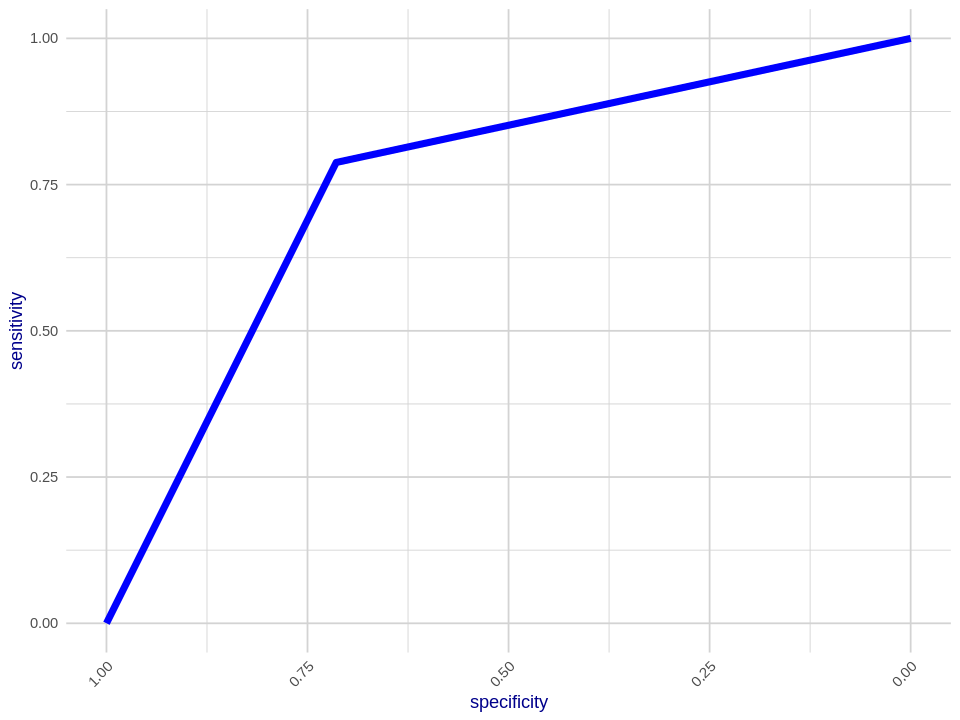

In [ ]:
# Install and load the necessary libraries
install.packages(c("pROC", "ggplot2"))
library(pROC)
library(ggplot2)

# Print accuracy on the training set
train_accuracy_nb <- sum(predict(nb_model, newdata = cbind(y_train, x_train)) == y_train) / length(y_train)
cat("Accuracy of Naive Bayes on trained dataset: ", train_accuracy_nb, "\n")

# Use the trained model to predict on the test set
predictions_nb <- predict(nb_model, newdata = cbind(y_test, x_test))

# Print accuracy on the test set
test_accuracy_nb <- sum(predictions_nb == y_test) / length(y_test)
cat("Accuracy of Naive Bayes on test dataset: ", test_accuracy_nb, "\n")

# Create a ROC curve
roc_curve <- roc(y_test, as.numeric(predictions_nb))

# Plot the ROC curve
roc_plot <- ggroc(roc_curve, main = "ROC Curve for Naive Bayes", col = "blue", lwd = 2)
print(roc_plot)